# **Qatar Airways Data Analysis**

Importing all required Libraries

In [1]:
!pip install ptitprince
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import ptitprince as pt

In [2]:
# Reading dataset.
df = pd.read_csv(r"C:\Users\91812\Downloads\qatar_airways_reviews.csv")

In [3]:

df.head()

,Unnamed: 0,Date Published,Rating,Max Rating,Title,Author,Country,Date,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
0,0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,2024-03-02,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0
1,1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,2024-02-29,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0
2,2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,2024-02-29,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0
3,3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,2024-02-25,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,NaN,A380-800,1.0
4,4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,2024-02-22,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0


In [4]:
# Dropping unnecessary column.
df.drop("Unnamed: 0",axis =1, inplace = True)

In [5]:
# Screening details of table
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2369 non-null   object 
 1   Rating             2368 non-null   float64
 2   Max Rating         2368 non-null   float64
 3   Title              2369 non-null   object 
 4   Author             2369 non-null   object 
 5   Country            2369 non-null   object 
 6   Date               2369 non-null   object 
 7   Review Body        2369 non-null   object 
 8   Type Of Traveller  1934 non-null   object 
 9   Seat Type          2369 non-null   object 
 10  Route              1931 non-null   object 
 11  Date Flown         1925 non-null   object 
 12  Recommended        588 non-null    object 
 13  Aircraft           1281 non-null   object 
 14  Verified           1252 non-null   float64
dtypes: float64(3), object(12)
memory usage: 277.7+ KB


In [6]:
# Describing numerical values.
df.describe()

,Rating,Max Rating,Verified
count,2368.000000,2368.0,1252.000000
mean,7.311233,10.0,0.920128
std,2.861367,0.0,0.271204
min,1.000000,10.0,0.000000
25%,5.000000,10.0,1.000000
50%,8.000000,10.0,1.000000
75%,10.000000,10.0,1.000000
max,10.000000,10.0,1.000000


From above table we can see two columns named `Date Published` and `Date`, hence we need to identify whether both have same data or not, Conforming whether `Date Published` & `Date` column has same values or not, if they are same then we can remove any one column as it developes redundancy  

In [7]:
(df['Date Published'] == df['Date']).value_counts()

True    2369
Name: count, dtype: int64

Above code confirm that both columns have same data.

from above code we can remove `Date` column from the table.

In [8]:
df.drop('Date', axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2369 non-null   object 
 1   Rating             2368 non-null   float64
 2   Max Rating         2368 non-null   float64
 3   Title              2369 non-null   object 
 4   Author             2369 non-null   object 
 5   Country            2369 non-null   object 
 6   Review Body        2369 non-null   object 
 7   Type Of Traveller  1934 non-null   object 
 8   Seat Type          2369 non-null   object 
 9   Route              1931 non-null   object 
 10  Date Flown         1925 non-null   object 
 11  Recommended        588 non-null    object 
 12  Aircraft           1281 non-null   object 
 13  Verified           1252 non-null   float64
dtypes: float64(3), object(11)
memory usage: 259.2+ KB


Checking for any duplicate values

In [10]:
df.duplicated().any()

True

In [11]:
# Displaying duplicated record
df[df.duplicated()]

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
2104,2014-10-13,4.0,10.0,Qatar Airways customer review,Geoff Harris,United Kingdom,Qatar Airways has really gone downhill at leas...,NaN,Economy Class,NaN,NaN,no,NaN,NaN


Dropping duplicated, keeping the `first record` as true value.

In [12]:
df.drop_duplicates(keep='first', inplace=True)

Verfying the above code

In [13]:
df.duplicated().any()

False

Checking for `NULL Values`

In [14]:
df.isna().sum()

Date Published          0
Rating                  1
Max Rating              1
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller     434
Seat Type               0
Route                 437
Date Flown            443
Recommended          1781
Aircraft             1087
Verified             1116
dtype: int64

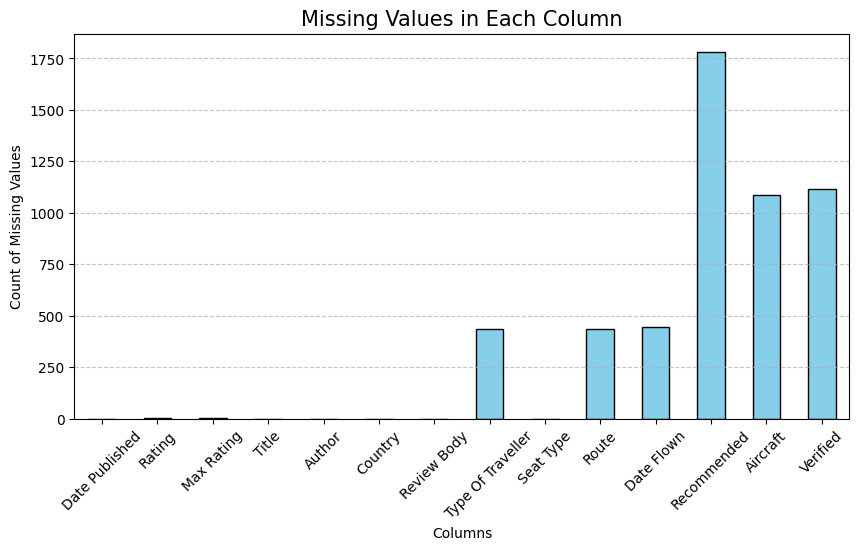

In [15]:
missing_values = df.isna().sum()

# Plot a bar chart
plt.figure(figsize=(10,5))
missing_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Missing Values in Each Column", fontsize=15)
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

Finding null values in `Rating` column

In [16]:
df[df['Rating'].isna()]

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
1308,2017-09-16,NaN,NaN,"""fabulous service from Qatar Airways""",R Kirchner,United Kingdom,✅ Verified Review | Munich to Doha onboard a ...,Solo Leisure,Economy Class,Munich to Doha,September 2017,NaN,A350,NaN


As we can't replace any value in `Rating` and `Max Rating` column for above record, since we don't have any feature to predict, we;ll remove that record from database.

In [17]:
df.dropna(subset=['Rating'], inplace = True)

In [18]:
df.isna().sum().sort_values()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Seat Type               0
Type Of Traveller     434
Route                 437
Date Flown            443
Aircraft             1087
Verified             1115
Recommended          1780
dtype: int64

## **Cleaning**

### **1. Type of Traveller**

In [19]:
# Finding types of categories in 'Type of Traveller' column to segregate
df['Type Of Traveller'].value_counts()

Type Of Traveller
Solo Leisure      841
Couple Leisure    458
Business          325
Family Leisure    309
Name: count, dtype: int64

In [20]:
# Finding Non-Null values in the column
df['Type Of Traveller'].notna().sum()

1933

In [21]:
# Finding Null values in column 
df['Type Of Traveller'].isna().sum()

434

In [22]:
# Adding null values and not null values to get total count matching total rows in data.
(df['Type Of Traveller'].notna().sum()) + (df['Type Of Traveller'].isna().sum())

2367

We've total `434` values missing which needs to be imputed.

`Since we didn't have any dependent column/data to find and fill missing values with some sensible/relatable data, we will need to impute that data with `Unknown` value. `

In [23]:
# Filling null values with 'Unknown' Vlaues in 'Type of Traveller' column
df['Type Of Traveller'].fillna("Unknown", inplace = True)

In [24]:
# Verifying above changes done.
df.isna().sum().sort_values()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown            443
Aircraft             1087
Verified             1115
Recommended          1780
dtype: int64

### **2. Date Flown**

Since we've dates already mentioned in `Published column` hence we fetch dates from there to `Date Flown` column. 

Checking for data type of `Date Published` and `Date Flown`.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2367 entries, 0 to 2368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     2367 non-null   object 
 1   Rating             2367 non-null   float64
 2   Max Rating         2367 non-null   float64
 3   Title              2367 non-null   object 
 4   Author             2367 non-null   object 
 5   Country            2367 non-null   object 
 6   Review Body        2367 non-null   object 
 7   Type Of Traveller  2367 non-null   object 
 8   Seat Type          2367 non-null   object 
 9   Route              1930 non-null   object 
 10  Date Flown         1924 non-null   object 
 11  Recommended        587 non-null    object 
 12  Aircraft           1280 non-null   object 
 13  Verified           1252 non-null   float64
dtypes: float64(3), object(11)
memory usage: 277.4+ KB


Both beign `OBJECT` type, we need to convert `Date Published` column to Datetime format from object type, and then for `Date Flown`

In [26]:
# Changing DataType of `dateTime` column from `Object` to `DateTime[ns]`
df['Date Published'] = pd.to_datetime(df['Date Published'])

Using `fillna` to impute values in `Date Flown` from `Date Published` in `Month Year` format

In [27]:
# Converting the datetime format and filling null values with specified format from 'Date Published' column.

df['Date Flown'] = pd.to_datetime(df['Date Flown'], format='%B %Y', errors='coerce')
df['Date Flown'] = df['Date Flown'].fillna(df['Date Published'].dt.strftime('%B %Y'))

Converting Date Flown to `Month Year` format from Normal Date format

In [28]:
# COnverting normal date format to ' Month Year' date format.
df['Date Flown'] = df['Date Flown'].dt.strftime('%B %Y')

### **3. Verified**

In [29]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified             1115
dtype: int64

In [30]:
# Unique categories in column
df['Verified'].unique()

array([ 0.,  1., nan])

In [31]:
# Searching and selecting those rows which has 'Verified Review' in 'Review Body' so that can be mapped for further analysis. 
verified_reviews = df[df['Review Body'].str.contains('Verified Review', case=False)].copy()

In [32]:
# Below are all the Travellers whose review is verified and van be used to replace/impute null values in 'Verified' column to fill as `1.0`.
verified_reviews

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
1255,2017-11-18,10.0,10.0,"""Great service in the cabin""",G Stanton,Hong Kong,✅ Verified Review | Kiev to Doha. Plane took ...,Solo Leisure,Economy Class,Kiev to Doha,November 2017,NaN,A320,NaN
1256,2017-11-18,10.0,10.0,"""100% happy with what they offered""",Anton Gots,Hong Kong,✅ Verified Review | Flew Doha to Hong Kong. F...,Solo Leisure,Economy Class,Doha to Hong Kong,November 2017,NaN,Boeing 787,NaN
1257,2017-11-17,10.0,10.0,"""Crew are wonderful""",D Anderson,Qatar,✅ Verified Review | Flew Paris CDG to Doha. T...,Business,Business Class,Paris to Doha,November 2017,NaN,A350-900,NaN
1258,2017-11-17,6.0,10.0,"""flight was good although food not""",G Litten,Australia,✅ Verified Review | Sydney to Amsterdam via D...,Couple Leisure,Business Class,Sydney to Amsterdam via Doha,November 2017,no,A380,NaN
1259,2017-11-12,6.0,10.0,"""Service out of CPH was rushed""",D Webb,United Kingdom,✅ Verified Review | Copenhagen to Male via Do...,Couple Leisure,Business Class,Copenhagen to Male via Doha,November 2017,NaN,Boeing 787 / A350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,2016-03-31,5.0,10.0,"""all flights on time""",C Stanhope,United Kingdom,✅ Verified Review | London to Colombo via Doh...,Couple Leisure,Economy Class,LHR to CNB via DOH,March 2016,no,Boeing 777 / 787 / A340,NaN
1662,2016-03-30,10.0,10.0,"""experience was excellent""",C Kay,United Kingdom,✅ Verified Review | Edinburgh to Male via Doh...,Couple Leisure,Business Class,EDI to MLE via DOH,March 2016,NaN,Boeing 787 / A330 / A320,NaN
1664,2016-03-28,10.0,10.0,"""very polite, friendly and smiling""",M Mawanga,United Kingdom,✅ Verified Review | London Heathrow to Cape T...,Solo Leisure,Economy Class,LHR to CPT via DOH,February 2016,NaN,NaN,NaN
1665,2016-03-26,10.0,10.0,"""fantastic business class experience""",A Ahmed,United Kingdom,✅ Verified Review | Copenhagen to Melbourne v...,Solo Leisure,Business Class,CPH to MEL via DOH,February 2016,NaN,Boeing 787-8 / 777-300ER,NaN


In [35]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified             1115
dtype: int64

Here from above codes we've 368 rows as NaN which can be imputed with `1.0` making it as `Verified` review, and others as `0` making it Unverified review.

In [38]:
# Converting data to .csv format for easy view.
verified_reviews = verified_reviews.to_csv("verified_reviews.csv")

## ***Savepoint 1***

In [39]:
# Reading .csv file of Verified reviews
verified_reviews = pd.read_csv("verified_reviews.csv")

In [40]:
verified_reviews['Verified'].isna().sum()

368

In [41]:
# Checking for % of each category
df['Verified'].value_counts(normalize = True)*100

Verified
1.0    92.01278
0.0     7.98722
Name: proportion, dtype: float64

We've total 92% of reviews Verified.

In [42]:
# Null values in 'Verified' column
df['Verified'].isna().sum()

1115

Imputing values in column `Verified Review` using `.loc` method 

In [43]:
verified_rows = df[df['Review Body'].str.contains('Verified Review', case=False)]

# mapping verified_rows tin main dataset 'df' and filling null values with '1.0' as Verified.
df.loc[verified_rows.index, 'Verified'] = df.loc[verified_rows.index, 'Verified'].fillna(1.0)

In [44]:
# Remaining null values after imputation of '1.0' in dataset.
df['Verified'].isna().sum()

747

In [45]:
# Checking for any null values for condition in 'Verified Review' in data
df[df['Review Body'].str.contains('Verified Review', case=False)].isna().sum()

Date Published         0
Rating                 0
Max Rating             0
Title                  0
Author                 0
Country                0
Review Body            0
Type Of Traveller      0
Seat Type              0
Route                  0
Date Flown             0
Recommended          286
Aircraft              79
Verified               0
dtype: int64

Hence from above code we can confirm that we've imputed values successfully into 'Verified' column as tyhere are no null values inplace of 'Verified Review' being the comment in 'Review Body'.

In [46]:
# Cehcking for null values after imputation of verified rows
df['Verified'].isna().sum()

747

In [47]:
# mapping rows inverted to above imputations.
not_verified_reviews = df[~df['Review Body'].str.contains('Verified Review', case=False)].copy()

In [48]:
# Confirming the number of rows to be imputed as 0.0
not_verified_reviews['Verified'].isna().sum()

747

`Imputing rest other NaN values with 0.0`, as further there is no other dependent column from where we can consider whether it is Verified or not, hence...

In [49]:
not_verified_reviews = df[~df['Review Body'].str.contains('Verified Review', case=False)]

df.loc[not_verified_reviews.index, 'Verified'] = df.loc[not_verified_reviews.index, 'Verified'].fillna(0.0)

In [50]:
# Confirming imputation of above codes.
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified                0
dtype: int64

### **4. Recommended**

In [51]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended          1780
Aircraft             1087
Verified                0
dtype: int64

Need to find how many travellers have `recommended` as `no`.

In [52]:
df['Recommended'].value_counts()

Recommended
no    587
Name: count, dtype: int64

In [53]:
df['Recommended'].isna().sum()

1780

In [54]:
# Adding NULL values and not-null values to get total count of rows.
total = (df['Recommended'].value_counts() + df['Recommended'].isna().sum())
total

Recommended
no    2367
Name: count, dtype: int64

Since we have major values as `NULL`, we have rating column which can be used as paramter to consider recommendation as `Yes` or `No`, hence we group by and find out ratings provided by travellers. 

In [55]:
# Total number of Travellers by ratings given. 
df['Rating'].value_counts()

Rating
10.0    726
9.0     412
8.0     279
7.0     212
5.0     154
1.0     152
6.0     134
3.0     109
4.0      97
2.0      92
Name: count, dtype: int64

In [56]:
# Grouping by Rating and recommendation for understanding distribution
df.groupby(['Rating'])['Recommended'].value_counts()

Rating  Recommended
1.0     no             151
2.0     no              87
3.0     no              96
4.0     no              82
5.0     no              92
6.0     no              52
7.0     no              22
8.0     no               1
9.0     no               3
10.0    no               1
Name: count, dtype: int64

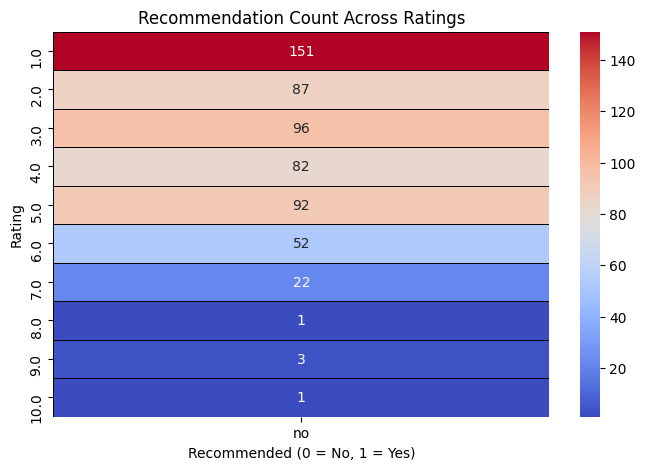

In [57]:
# Creating a pivot table for heatmap
heatmap_data = df.pivot_table(index='Rating', columns='Recommended', aggfunc='size', fill_value=0)

# Plot the heatmap with new colors
plt.figure(figsize=(8,5))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, linecolor='black')

plt.title("Recommendation Count Across Ratings")
plt.xlabel("Recommended (0 = No, 1 = Yes)")
plt.ylabel("Rating")
plt.show()

From above plot we can assume that Travellers who are rating airline as or above 8.0 out of 10.0 have very less probability of not recommending.

From above code, we justify that `any rating under 8.0 shall be considered as Not recommended and above 8.0 as Recommended`. 

In [58]:
rating_mask = df['Rating'] < 8

df.loc[rating_mask, 'Recommended'] = df.loc[rating_mask, 'Recommended'].fillna('no')
df.loc[~rating_mask, 'Recommended'] = df.loc[~rating_mask, 'Recommended'].fillna('Yes')

In [59]:
# Grouping ratings, recommendations and counts of travellers on each points.
grouped = df.groupby(['Rating'])['Recommended'].value_counts()

In [60]:
print(grouped)

Rating  Recommended
1.0     no             152
2.0     no              92
3.0     no             109
4.0     no              97
5.0     no             154
6.0     no             134
7.0     no             212
8.0     Yes            278
        no               1
9.0     Yes            409
        no               3
10.0    Yes            725
        no               1
Name: count, dtype: int64


In [61]:
# Recommendation Percentage by Travellers
df['Recommended'].value_counts(normalize=True)*100

Recommended
Yes    59.65357
no     40.34643
Name: proportion, dtype: float64

In [62]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended             0
Aircraft             1087
Verified                0
dtype: int64

### **5. Route**

In [63]:
# Displaying data with `Route` column being empty/NULL
df[df['Route'].isna()]

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified
836,2019-09-28,1.0,10.0,"""Bitterly disappointed""",C Johnson,United Kingdom,Kuwait to Manchester via Doha. Bitterly disap...,Business,First Class,NaN,September 2019,no,Boeing 777,1.0
1823,2015-10-01,9.0,10.0,"""cabin crew friendly and obliging""",Mike Cameron,United Kingdom,"We flew London to Dubai through Doha, using Qa...",Couple Leisure,Economy Class,NaN,September 2015,Yes,Boeing 777,0.0
1933,2015-06-13,9.0,10.0,Qatar Airways customer review,B Johnson,South Africa,For someone who has become used to the standar...,Business,Business Class,NaN,June 2015,Yes,NaN,0.0
1934,2015-06-07,7.0,10.0,Qatar Airways customer review,W Woon,Singapore,4 flight sectors altogether: SIN-DOH-LHR on 5 ...,Unknown,Economy Class,NaN,June 2015,no,NaN,0.0
1935,2015-06-06,10.0,10.0,Qatar Airways customer review,Graham Williams,United Kingdom,I flew to Thailand for my honeymoon with Qatar...,Unknown,Economy Class,NaN,June 2015,Yes,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2013-08-12,9.0,10.0,Qatar Airways customer review,R Nash,Australia,Flew first class CAI-DOH on QR503 on 8th Aug 2...,Unknown,First Class,NaN,August 2013,Yes,NaN,0.0
2365,2013-08-06,7.0,10.0,Qatar Airways customer review,Gamage Champika,United Arab Emirates,I took a flight to London on 17th July with my...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0
2366,2013-08-06,5.0,10.0,Qatar Airways customer review,Martin Fernandez,Spain,MAD-DOH-DXB and back. Boeing 777 in MAD-DOH se...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0
2367,2013-08-06,7.0,10.0,Qatar Airways customer review,David Monteiro,Switzerland,GVA-AUH A320. Good food but after the main mea...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0


We've total 437 rows to be filled from being missing in `Route` Column

Total 437 rows of route needs to be imputed to get accurate recommendation system

In [64]:
df['Route'].unique()

array(['Tokyo to London Heathrow via Doha', 'Doha to Montreal',
       'Doha to Perth', ..., 'Milan-Doha and Doha-Guangzhou',
       'Singapore-Doha-Johannesburg', 'MEL-DOH-LHR-DOH-MEL'], dtype=object)

In [65]:
df['Route'].value_counts()

Route
Bangkok to Doha                      16
Doha to Bangkok                      13
Doha to London                       13
London to Doha                       12
LHR to BKK via DOH                    9
                                     ..
Milan to Auckland via Doha/Sydney     1
Amman to Bangkok via Doha             1
Lisbon to Doha                        1
Doha to Dallas                        1
MEL-DOH-LHR-DOH-MEL                   1
Name: count, Length: 1380, dtype: int64

In [66]:
df['Route'].notna().sum()

1930

Total records which contains `"To"` in text are `1920`, hence this many records can be splitted into two dirrenect column.

In [68]:
# Counting records which contains "to" as keyword in `Route` column
(df['Route'].str.contains("to").sum()) 

1920

In [69]:
# Vice Versa of above code, selecting columns which does nto contains 'To' in column 'Route'
(~(df['Route'].astype(str).str.contains("to"))).sum()

447

From above code we can understand that there are 1920 records which contains `to` word, which could be used to split the Route into two different columns 

In [70]:
# Splitting the 'Route' column into 'From' and 'To' columns
df[['From', 'To']] = df['Route'].str.split(' to ', expand=True)

In [72]:
# Not Null values in 'From' column
df['From'].notna().sum()

1930

From above and below code we have successfully created 2 diff column i.e `From` and `To`with all getting split from `To` Keyword, further from column `To` we'll split new column called `Via`, in which data will be extracted from `To` column. 

In [73]:
# # Not Null values in 'To' column
df['To'].notna().sum()

1920

Now Since there are 1920 column filled in `To` column there are still 10 rows being empty, need to check those.

In [74]:
df[['Author', 'Route']][df['From'].notna() & df['To'].isna()]

,Author,Route
1570,B Nalikov,doh TO sof
1911,Tom Osborne,LHR-DOH-BKK
1913,Denzil Bourne,SIN-LHR via DOH
1914,Denzil Bourne,LHR-SIN via DOH
1921,R Clarke,MEL-DOH-BAH
1927,M LaPrairie,IAD-DOH
1928,B Wijesinghe,IAD-DOH-CMB-DOH-IAD
1930,F Bertoni,Milan-Doha and Doha-Guangzhou
1931,Rob Wood,Singapore-Doha-Johannesburg
1932,Dan James,MEL-DOH-LHR-DOH-MEL


Here for above 10 records, we'll manually update data into those rows.

In [76]:
# Define a dictionary with authors and their corresponding 'From' and 'To' values
updates = {
    'Tom Osborne': ('Heathrow', 'Suvarnabhumi'),
    'Denzil Bourne': ('Singapore', 'Heathrow'),
    'B Nalikov': ('Doha', 'Sofia'),
    'R Clarke': ('Melbourne', 'Bahrain'),
    'M LaPrairie': ('Dulles', 'Doha'),
    'B Wijesinghe': ('Dulles', 'Bandaranaike'),
    'F Bertoni': ('Milan', 'Guangzhou'),
    'Dan James': ('Melbourne', 'Heathrow')
}

# Loop through the dictionary and update the DataFrame
for author, (from_location, to_location) in updates.items():
    condition = df['Author'] == author
    df.loc[condition, 'From'] = from_location
    df.loc[condition, 'To'] = to_location


In [77]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Dusseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'Gatwick', 'Bali',
       'Copenhagen', 'Dallas Ft Worth', 'Manchester', 'Athens',
       'Ho Chi Minh', 'Düsseldorf', 'Bangkok', 'Ho Chi Minh City',
       'Kuwait', 'Dubai', 'Milan', 'Brisbane', 'Mahé', 'Lusaka',
       'Istanbul', 'Melbourne', 'Seattle', 'Brussels', 'Perth',
       'Denpasar', 'Stockholm', 'Riyadh', 'Zurich', 'Singapore', 'doh',
       'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Jarkata', 'Bucharest',
       'Phuket', 'Dublin', 'Manila', 'Harare', 'New York JFK', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'La

In [78]:
df['To'].unique()

array(['London Heathrow via Doha', 'Montreal', 'Perth', 'London Heathrow',
       'Doha', 'London', 'San Francisco', 'Kilimanjaro via Doha',
       'Melbourne via Doha', 'Johannesburg via Doha', 'Dubai via Doha',
       'Adelaide', 'Doha via Phuket', 'Detroit via Doha',
       'Singapore via Doha', 'Perth via Doha', 'Auckland via Doha',
       'Erbil via Doha', 'London via Doha', 'Goa', 'Brussels',
       'Adelaide via Doha', 'Kolkata via Doha', 'Bangkok via Doha',
       'Bangkok', 'Frankfurt', 'Sydney', 'Manchester via Doha',
       'Warsaw via Doha', 'Tokyo via Doha', 'Delhi via Doha',
       'Kuala Lumpur via Doha', 'Salalah via Doha', 'Amsterdam via Doha',
       'Johannesburg', 'Tbilisi via Doha', 'Lyon via Doha', 'Denpasar',
       'Washington', 'Luanda via Doha', 'Lusaka via Doha',
       'Milan via Doha', 'kwi', 'Sao Paulo via Doha', 'Chicago',
       'Brussels via Doha', 'Seattle', 'Kuwait via Doha', 'Singapore',
       'Gatwick via Doha', 'Denpasar Bali via Doha', 'Cape Town

In [79]:
# Defining a regular expression pattern to extract text after 'via'
pattern = r'via\s+(.*)'

# Extracting text after 'via' using str.extract() and creating a new column 'Via'
df['Via'] = df['Route'].str.extract(pattern, expand=False)


In [80]:
# Creating a new column 'via' by extracting values from 'to' column text before 'via'
df['To'] = df['To'].str.split(' via ').str[0]

# Display the DataFrame to verify the changes
df

,Date Published,Rating,Max Rating,Title,Author,Country,Review Body,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,Verified,From,To,Via
0,2024-03-02,1.0,10.0,“marred by inconveniences”,Mary Le,United Kingdom,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,Tokyo to London Heathrow via Doha,March 2024,no,NaN,0.0,Tokyo,London Heathrow,Doha
1,2024-02-29,1.0,10.0,"""seat wouldn't stay up""",Brian English,Canada,They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,Doha to Montreal,February 2024,no,NaN,1.0,Doha,Montreal,NaN
2,2024-02-29,1.0,10.0,"""no attempt to address our complaint""",Wayne Burgess,Australia,I have sent 5 emails and have only received ...,Business,Economy Class,Doha to Perth,November 2023,no,A380,1.0,Doha,Perth,NaN
3,2024-02-25,10.0,10.0,“I hope they update the A380”,Alwaleed Althani,Qatar,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,Doha to London Heathrow,February 2024,Yes,A380-800,1.0,Doha,London Heathrow,NaN
4,2024-02-22,7.0,10.0,"""I’d rate them maybe 7/10""",W Warnock,United Kingdom,"Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,Auckland to Doha,February 2024,no,A350,1.0,Auckland,Doha,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,2013-08-12,9.0,10.0,Qatar Airways customer review,R Nash,Australia,Flew first class CAI-DOH on QR503 on 8th Aug 2...,Unknown,First Class,NaN,August 2013,Yes,NaN,0.0,NaN,NaN,NaN
2365,2013-08-06,7.0,10.0,Qatar Airways customer review,Gamage Champika,United Arab Emirates,I took a flight to London on 17th July with my...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0,NaN,NaN,NaN
2366,2013-08-06,5.0,10.0,Qatar Airways customer review,Martin Fernandez,Spain,MAD-DOH-DXB and back. Boeing 777 in MAD-DOH se...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0,NaN,NaN,NaN
2367,2013-08-06,7.0,10.0,Qatar Airways customer review,David Monteiro,Switzerland,GVA-AUH A320. Good food but after the main mea...,Unknown,Economy Class,NaN,August 2013,no,NaN,0.0,NaN,NaN,NaN


In [81]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Dusseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'Gatwick', 'Bali',
       'Copenhagen', 'Dallas Ft Worth', 'Manchester', 'Athens',
       'Ho Chi Minh', 'Düsseldorf', 'Bangkok', 'Ho Chi Minh City',
       'Kuwait', 'Dubai', 'Milan', 'Brisbane', 'Mahé', 'Lusaka',
       'Istanbul', 'Melbourne', 'Seattle', 'Brussels', 'Perth',
       'Denpasar', 'Stockholm', 'Riyadh', 'Zurich', 'Singapore', 'doh',
       'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Jarkata', 'Bucharest',
       'Phuket', 'Dublin', 'Manila', 'Harare', 'New York JFK', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'La

In [82]:
df['To'].unique()

array(['London Heathrow', 'Montreal', 'Perth', 'Doha', 'London',
       'San Francisco', 'Kilimanjaro', 'Melbourne', 'Johannesburg',
       'Dubai', 'Adelaide', 'Detroit', 'Singapore', 'Auckland', 'Erbil',
       'Goa', 'Brussels', 'Kolkata', 'Bangkok', 'Frankfurt', 'Sydney',
       'Manchester', 'Warsaw', 'Tokyo', 'Delhi', 'Kuala Lumpur',
       'Salalah', 'Amsterdam', 'Tbilisi', 'Lyon', 'Denpasar',
       'Washington', 'Luanda', 'Lusaka', 'Milan', 'kwi', 'Sao Paulo',
       'Chicago', 'Seattle', 'Kuwait', 'Gatwick', 'Denpasar Bali',
       'Cape Town', 'Brisbane', 'Kathmanda', 'Muscat', 'Athens', 'Vienna',
       'Rome', 'Bahrain', 'Colombo', 'Abu Dhabi', 'Istanbul', 'Barcelona',
       'Paris', 'Phuket', 'Edinburgh', 'Kochi', 'Tehran', 'Mumbai',
       'Zurich', 'Berlin', 'New York JFK', 'Windhoek', 'Philadelphia',
       'Riyadh', 'Jakarta', 'Lagos', 'Cochin', 'Baghdad', 'Bali', 'Dhaka',
       'Bucharest', 'Hanoi', 'Dallas', 'Manila', 'Ord', 'Dublin',
       'Zagreb', 'Madrid', 'S

In [83]:
df['Via'].unique()

array(['Doha', nan, 'Phuket', 'Dohs', 'dona', 'Montreal & Doha',
       'Doha / Perth', 'Doha, Qatar', 'Doha & Hong Kong',
       'Montreal / Doha', 'Manila', 'Brisbane', 'Dubai', 'Brussels',
       'Dha', 'doha', 'Entebbe, Doha', 'Copenhagen', 'London', 'Adelaide',
       'New York', 'Doha/Sydney', 'Delhi', 'Qatar', 'DOH',
       'Sydney / Doha', 'Bangkok', 'Jakarta', 'Adelaide / Doha', 'Sydney',
       'Baku / Doha', 'Doha, Entebbe', 'SIN', 'BKK / DOH', 'DOA',
       'BKK and DOH', 'DXB', 'BKK/DOH', 'DOH/JNB', 'BRU', 'DSOH', 'BKK',
       'LHR/DOH', 'DOH/BKK', 'BKK, DOH', 'DOH and BKK',
       'BKK-DOH-CPH//DOH'], dtype=object)

In [84]:
df[['From', "To", 'Via']].isna().sum()

From     425
To       426
Via     1010
dtype: int64

In [85]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Title                   0
Author                  0
Country                 0
Review Body             0
Type Of Traveller       0
Seat Type               0
Route                 437
Date Flown              0
Recommended             0
Aircraft             1087
Verified                0
From                  425
To                    426
Via                  1010
dtype: int64

In [86]:
# Not Null values in 'Via' Column
df['Via'].notna().sum()

1357

In [87]:
# Converting `Route` Column to String Type
df['Route'] = df['Route'].astype(str)

# Filtering those records which does not contains `Via` in `Route` column
filtered_df = df[~df['Route'].str.contains('via')]

In [88]:
# Replacing above records with `Direct` as Flight
df.loc[filtered_df.index, "Via"] = "Direct"

In [89]:
# Conforming Non-Null values after imputation.
df['Via'].isna().sum()

0

Converting `Route` back to `Object` datatype, and replacing `nan`(text values) values with `NaN`(null values) 

In [90]:
df['Route'] = df['Route'].astype(object)

In [91]:
df['Route'] = df['Route'].replace('nan', np.nan)

In [92]:
df.columns

Index(['Date Published', 'Rating', 'Max Rating', 'Title', 'Author', 'Country',
       'Review Body', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Recommended', 'Aircraft', 'Verified', 'From', 'To', 'Via'],
      dtype='object')

Rearranging the columns

In [93]:
df = df[['Date Published', 'Rating', 'Max Rating','Author', 'Country','Title', 'Review Body', 'Type Of Traveller', 'Seat Type','Date Flown','Aircraft','Route', 'From','Via', 'To','Verified','Recommended'   ]]

In [94]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Author                  0
Country                 0
Title                   0
Review Body             0
Type Of Traveller       0
Seat Type               0
Date Flown              0
Aircraft             1087
Route                 437
From                  425
Via                     0
To                    426
Verified                0
Recommended             0
dtype: int64

#### **Replacing Duplicated/Incorrect names in `From` Column**

In [95]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Dusseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'Gatwick', 'Bali',
       'Copenhagen', 'Dallas Ft Worth', 'Manchester', 'Athens',
       'Ho Chi Minh', 'Düsseldorf', 'Bangkok', 'Ho Chi Minh City',
       'Kuwait', 'Dubai', 'Milan', 'Brisbane', 'Mahé', 'Lusaka',
       'Istanbul', 'Melbourne', 'Seattle', 'Brussels', 'Perth',
       'Denpasar', 'Stockholm', 'Riyadh', 'Zurich', 'Singapore', 'doh',
       'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Jarkata', 'Bucharest',
       'Phuket', 'Dublin', 'Manila', 'Harare', 'New York JFK', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'La

Replacing `From` Values with unique values.

In [96]:
name_mapping = {
    'doh': 'Doha',
    'Düsseldorf': 'Dusseldorf',
    'Ho chi Minh City': 'Ho Chi Minh',
    'Brisibane': 'Brisbane',
    'madrid': 'Madrid',
    'manchester': 'Manchester',
    'DEL': 'New Delhi',
    'Doha ': 'Doha',
    'Jarkata': 'Jakarta',
    'MAD': 'Madrid',
    'TXL': 'Berlin Tegel',
    'BCN': 'Barcelona',
    'DOH': 'Doha',
    'KUL': 'Kuala Lumpur',
    'DPS': 'Denpasar',
    'MNL': 'Manila',
    'LHR': 'London Heathrow',
    'CPH': 'Copenhagen',
    'EZE': 'Buenos Aires',
    'MAN': 'Manchester',
    'EDI': 'Edinburgh',
    'SVO': 'Moscow',
    'MEL': 'Melbourne',
    'TUN': 'Tunis'
}

# Replace values in the 'airport_names' column using the mapping
df['From'] = df['From'].replace(name_mapping)

In [97]:
# Full name mapping dictionary
full_name_mapping = {
    'OSL': 'Oslo',
    'PHL': 'Philadelphia',
    'PER': 'Perth',
    'PNH': 'Phnom Penh',
    'AMM': 'Queen Alia',
    'VCE': 'Venice Marco Polo',
    'ARN': 'Stockholm Arlanda',
    'CPT': 'Cape Town',
    'IAH': 'George Bush',
    'SYD': 'Sydney',
    'HKT': 'Phuket',
    'AMS': 'Amsterdam Schiphol',
    'AUH': 'Abu Dhabi',
    'JNB': 'OR Tambo',
    'ATL': 'Hartsfield-Jackson Atlanta',
    'DXB': 'Dubai',
    'JFK': 'John F. Kennedy',
    'SIN': 'Singapore Changi',
    'HAN': 'Noi Bai',
    'DFW': 'Dallas/Fort Worth',
    'HEL': 'Helsinki-Vantaa',
    'CMB': 'Bandaranaike',
    'PVG': 'Shanghai Pudong',
    'MUC': 'Munich',
    'SGN': 'Tan Son Nhat',
    'IKA': 'Tehran Imam Khomeini',
    'BOM': 'Chhatrapati Shivaji Maharaj',
    'LAX': 'Los Angeles',
    'BRU': 'Brussels',
    'ADL': 'Adelaide',
    'KHI': 'Jinnah',
    'LAS': 'McCarran',
    'ZAG': 'Zagreb',
    'ATH': 'Athens',
    'ICN': 'Incheon',
    'BEY': 'Beirut Rafic Hariri',
    'SOF': 'Sofia',
    'SAO': 'São Paulo Guarulhos',
    'FRA': 'Frankfurt',
    'TIF': 'Taif',
    'ZRH': 'Zurich',
    'WAW': 'Warsaw Chopin',
    'PSA': 'Pisa',
    'MCT': 'Muscat',
    'BOS': 'Logan',
    'CDG': 'Charles de Gaulle',
    'CGK': 'Soekarno Hatta',
    'IAD': 'Washington Dulles',
    'HKG': 'Hong Kong',
    'BHX': 'Birmingham',
    'ISB': 'Islamabad',
    'GRU': 'São Paulo/Guarulhos',
    'BLR': 'Kempegowda',
    'KIX': 'Kansai',
    'JED': 'King Abdulaziz',
    'BUD': 'Budapest Ferenc Liszt',
    'PEN': 'Penang',
    'RUH': 'King Khalid',
    'GYD': 'Heydar Aliyev',
    'MXP': 'Milan Malpensa',
    'HND': 'Haneda',
    'ORD': 'O\'Hare',
    'HBE': 'Borg El Arab',
    'NBO': 'Jomo Kenyatta',
    'NRT': 'Narita',
    'KTM': 'Tribhuvan',
    'SAW': 'Sabiha Gökçen',
    'FCO': 'Leonardo da Vinci Fiumicino',
    'KWI': 'Kuwait',
    'Cape Town': 'Cape Town',
    'DWC': 'Al Maktoum',
    'CAI': 'Cairo',
    'NYC': 'John F. Kennedy',
    'Dar es Salam': 'Julius Nyerere',
    'COK': 'Cochin',
    'Jinnah Int': 'Jinnah',
    'Dubai DWC': 'Al Maktoum',
    'KUala Lumpur': 'Kuala Lumpur'
}

# Replace abbreviated airport names with full names
df['From'] = df['From'].replace(full_name_mapping)


In [98]:
# Full name mapping dictionary
full_name_mapping = {
    'Tokyo': 'Tokyo',
    'Doha': 'Doha',
    'Auckland': 'Auckland',
    'New Delhi': 'New Delhi',
    'Dusseldorf': 'Düsseldorf',
    'Frankfurt': 'Frankfurt',
    'New York': 'New York',
    'Chicago': 'Chicago',
    'Nice': 'Nice',
    'Penang': 'Penang',
    'Ahmedabad': 'Ahmedabad',
    'Tbilisi': 'Tbilisi',
    'Spain': 'Spain',
    'London': 'London',
    'Beirut': 'Beirut',
    'Gatwick': 'London Gatwick',
    'Bali': 'Bali',
    'Copenhagen': 'Copenhagen',
    'Dallas Ft Worth': 'Dallas/Fort Worth',
    'Manchester': 'Manchester',
    'Athens': 'Athens',
    'Ho Chi Minh': 'Ho Chi Minh City',
    'Bangkok': 'Bangkok',
    'Ho Chi Minh City': 'Ho Chi Minh City',
    'Kuwait': 'Kuwait',
    'Dubai': 'Dubai',
    'Milan': 'Milan',
    'Brisbane': 'Brisbane',
    'Mahé': 'Mahé',
    'Lusaka': 'Lusaka',
    'Istanbul': 'Istanbul',
    'Melbourne': 'Melbourne',
    'Seattle': 'Seattle',
    'Brussels': 'Brussels',
    'Perth': 'Perth',
    'Denpasar': 'Denpasar',
    'Stockholm': 'Stockholm',
    'Riyadh': 'Riyadh',
    'Zurich': 'Zurich',
    'Singapore': 'Singapore',
    'Oslo': 'Oslo',
    'Kathmandu': 'Kathmandu',
    'Paris': 'Paris',
    'Vienna': 'Vienna',
    'Colombo': 'Colombo',
    'London Heathrow': 'London Heathrow',
    'Amsterdam': 'Amsterdam',
    'Washington': 'Washington',
    'Jakarta': 'Jakarta',
    'Abu Dhabi': 'Abu Dhabi',
    'Entebbe': 'Entebbe',
    'Johannesburg': 'Johannesburg',
    'Sydney': 'Sydney',
    'Philadelphia': 'Philadelphia',
    'Mumbai': 'Mumbai',
    'Warsaw': 'Warsaw',
    'Edinburgh': 'Edinburgh',
    'Islamabad': 'Islamabad',
    'Geneva': 'Geneva',
    'Montreal': 'Montreal',
    'Dallas': 'Dallas',
    'Hanoi': 'Hanoi',
    'Maputo': 'Maputo',
    'Rome': 'Rome',
    'Bucharest': 'Bucharest',
    'Phuket': 'Phuket',
    'Dublin': 'Dublin',
    'Manila': 'Manila',
    'Harare': 'Harare',
    'New York JFK': 'John F. Kennedy',
    'Boston': 'Boston',
    'Los Angeles': 'Los Angeles',
    'Madrid': 'Madrid',
    'Tehran': 'Tehran',
    'Sofia': 'Sofia',
    'Lagos': 'Lagos',
    'Prague': 'Prague',
    'Delhi': 'Delhi',
    'Franfurt': 'Frankfurt',
    'Nairobi': 'Nairobi',
    'Thailand': 'Thailand',
    'Atlanta': 'Atlanta',
    'São Paulo': 'São Paulo',
    'Algiers': 'Algiers',
    'Munich': 'Munich',
    'Barcelona': 'Barcelona',
    'Sharjah': 'Sharjah',
    'Miami': 'Miami',
    'Kuala Lumpur': 'Kuala Lumpur',
    'San Francisco': 'San Francisco',
    'Zagreb': 'Zagreb',
    'Cochin': 'Cochin',
    'Cape Town': 'Cape Town',
    'Kochi': 'Kochi',
    'Ankara': 'Ankara',
    'Kigali': 'Kigali',
    'Erbil': 'Erbil',
    'Maldives': 'Maldives',
    'Toronto': 'Toronto',
    'Hyderabad': 'Hyderabad',
    'Lagos, Nigeria': 'Lagos',
    'Tunis': 'Tunis',
    'Madrid ': 'Madrid',
    'Cairo': 'Cairo',
    'Male': 'Male',
    'Chennai': 'Chennai',
    'Bodrum ': 'Bodrum',
    'Malaga': 'Malaga',
    'Chengdu': 'Chengdu',
    'Cebu': 'Cebu',
    'Belgrade': 'Belgrade',
    'Dammam': 'Dammam',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Adelaide': 'Adelaide',
    'Hong Kong': 'Hong Kong',
    'Dallas Fort Worth': 'Dallas/Fort Worth',
    'Kozikhode': 'Kozhikode',
    'Houston': 'Houston',
    'Helsinki': 'Helsinki',
    'Zanzibar': 'Zanzibar',
    'Casablanca': 'Casablanca',
    'Dhaka': 'Dhaka',
    'Kyiv': 'Kyiv',
    'Berlin': 'Berlin',
    'Najaf': 'Najaf',
    'Lahore': 'Lahore',
    'Seoul': 'Seoul',
    'Muscat': 'Muscat',
    'Mogadishu': 'Mogadishu',
    'Zvartnots': 'Zvartnots',
    'Krabi': 'Krabi',
    'Sulaymaniyah': 'Sulaymaniyah',
    'Tblisi': 'Tbilisi',
    'Lisbon': 'Lisbon',
    'Amman': 'Amman',
    'Bangalore': 'Bangalore',
    'Amritsar': 'Amritsar',
    'Yangon': 'Yangon',
    'Budapest': 'Budapest',
    'Birmingham': 'Birmingham',
    'Dulles': 'Dulles',
    'Pisa': 'Pisa',
    'Venice': 'Venice',
    'Goa': 'Goa',
    'Heathrow': 'London Heathrow',
    'Cardiff': 'Cardiff',
    'Mahe': 'Mahé',
    'Kolkata': 'Kolkata',
    'Dar es Salaam': 'Dar es Salaam',
    'Kiev': 'Kiev',
    'Calicut': 'Kozhikode',
    'Moscow': 'Moscow',
    'Paris CDG': 'Charles de Gaulle',
    'Incheon': 'Incheon',
    'Gothenburg': 'Gothenburg',
    'Sarajevo': 'Sarajevo',
    'Clark': 'Clark',
    'London ': 'London',
    'Canberra': 'Canberra',
    'Mahé, Seychelles': 'Mahé',
    'Bombay': 'Mumbai',
    'Nagpur': 'Nagpur',
    'Shanghai': 'Shanghai',
    'Karachi': 'Karachi',
    'Marrakech': 'Marrakech',
    'Berlin Tegel': 'Berlin',
    'BKK': 'Bangkok',
    'Durban': 'Durban',
    'Baku': 'Baku',
    'MAA': 'Chennai',
    'Salalah': 'Salalah',
    'Berlin ': 'Berlin',
    'London Heatrhow': 'London Heathrow',
    'Phnom Penh': 'Phnom Penh',
    'Luxor': 'Luxor',
    'CRK': 'Clark',
    'Washington DC': 'Washington',
    'Medina': 'Medina',
    'Taif': 'Taif',
    'Buenos Aires': 'Buenos Aires',
    'Queen Alia': 'Queen Alia International',
    'Venice Marco Polo': 'Venice Marco Polo',
    'Stockholm Arlanda': 'Stockholm Arlanda',
    'George Bush': 'George Bush Intercontinental',
    'Amsterdam Schiphol': 'Amsterdam Airport Schiphol',
    'OR Tambo': 'O. R. Tambo International',
    'Hartsfield-Jackson Atlanta': 'Hartsfield-Jackson Atlanta International',
    'John F. Kennedy': 'John F. Kennedy International',
    'Singapore Changi': 'Singapore Changi Airport',
    'Noi Bai': 'Noi Bai International',
    'Dallas/Fort Worth': 'Dallas/Fort Worth International',
    'Helsinki-Vantaa': 'Helsinki Airport',
    'Bandaranaike': 'Bandaranaike International',
    'Shanghai Pudong': 'Shanghai Pudong International',
    'Tan Son Nhat': 'Tan Son Nhat International',
    'Tehran Imam Khomeini': 'Imam Khomeini International',
    'Chhatrapati Shivaji Maharaj': 'Chhatrapati Shivaji Maharaj International',
    'Jinnah': 'Jinnah International',
    'McCarran': 'McCarran International',
    'Beirut Rafic Hariri': 'Beirut Rafic Hariri International',
    'São Paulo Guarulhos': 'São Paulo/Guarulhos International',
    'Warsaw Chopin': 'Warsaw Chopin Airport',
    'Logan': 'Logan International',
    'Charles de Gaulle': 'Charles de Gaulle Airport',
    'Soekarno Hatta': 'Soekarno-Hatta International',
    'Washington Dulles': 'Washington Dulles International',
    'São Paulo/Guarulhos': 'São Paulo/Guarulhos International',
    'Kempegowda': 'Kempegowda International',
    'Kansai': 'Kansai International',
    'King Abdulaziz': 'King Abdulaziz International',
    'Budapest Ferenc Liszt': 'Budapest Ferenc Liszt International',
    'King Khalid': 'King Khalid International',
    'Heydar Aliyev': 'Heydar Aliyev International',
    'Milan Malpensa': 'Milan Malpensa Airport',
    'Haneda': 'Haneda Airport',
    "O'Hare": "O'Hare International",
    'Borg El Arab': 'Borg El Arab International',
    'Jomo Kenyatta': 'Jomo Kenyatta International',
    'Narita': 'Narita International',
    'Tribhuvan': 'Tribhuvan International',
    'Sabiha Gökçen': 'Sabiha Gökçen International',
    'Leonardo da Vinci Fiumicino': 'Leonardo da Vinci-Fiumicino Airport',
    'cape town': 'Cape Town',
    'Al Maktoum': 'Al Maktoum International',
    'Julius Nyerere': 'Julius Nyerere International'
}

# Replace airport names with full names
df['From'] = df['From'].replace(full_name_mapping)

In [99]:
df['From'].unique()

array(['Tokyo', 'Doha', 'Auckland', 'New Delhi', 'Düsseldorf',
       'Frankfurt', 'New York', 'Chicago', 'Nice', 'Penang', 'Ahmedabad',
       'Tbilisi', 'Spain', 'London', 'Beirut', 'London Gatwick', 'Bali',
       'Copenhagen', 'Dallas/Fort Worth', 'Manchester', 'Athens',
       'Ho Chi Minh City', 'Bangkok', 'Kuwait', 'Dubai', 'Milan',
       'Brisbane', 'Mahé', 'Lusaka', 'Istanbul', 'Melbourne', 'Seattle',
       'Brussels', 'Perth', 'Denpasar', 'Stockholm', 'Riyadh', 'Zurich',
       'Singapore', 'Oslo', 'Kathmandu', 'Paris', 'Vienna', 'Colombo',
       'London Heathrow', 'Amsterdam', 'Washington', 'Jakarta',
       'Abu Dhabi', 'Entebbe', 'Johannesburg', 'Sydney', 'Philadelphia',
       'Mumbai', 'Warsaw', 'Edinburgh', 'Islamabad', 'Geneva', 'Montreal',
       'Dallas', 'Hanoi', 'Maputo', 'Rome', 'Bucharest', 'Phuket',
       'Dublin', 'Manila', 'Harare', 'John F. Kennedy', 'Boston',
       'Los Angeles', 'Madrid', 'Tehran', 'Sofia', 'Lagos', 'Prague',
       'Delhi', 'Nairobi',

---

#### **Replacing Duplicated/Incorrect names in `To` Column**

Replacing `To` Values with unique values.

In [100]:
df['To'].unique()

array(['London Heathrow', 'Montreal', 'Perth', 'Doha', 'London',
       'San Francisco', 'Kilimanjaro', 'Melbourne', 'Johannesburg',
       'Dubai', 'Adelaide', 'Detroit', 'Singapore', 'Auckland', 'Erbil',
       'Goa', 'Brussels', 'Kolkata', 'Bangkok', 'Frankfurt', 'Sydney',
       'Manchester', 'Warsaw', 'Tokyo', 'Delhi', 'Kuala Lumpur',
       'Salalah', 'Amsterdam', 'Tbilisi', 'Lyon', 'Denpasar',
       'Washington', 'Luanda', 'Lusaka', 'Milan', 'kwi', 'Sao Paulo',
       'Chicago', 'Seattle', 'Kuwait', 'Gatwick', 'Denpasar Bali',
       'Cape Town', 'Brisbane', 'Kathmanda', 'Muscat', 'Athens', 'Vienna',
       'Rome', 'Bahrain', 'Colombo', 'Abu Dhabi', 'Istanbul', 'Barcelona',
       'Paris', 'Phuket', 'Edinburgh', 'Kochi', 'Tehran', 'Mumbai',
       'Zurich', 'Berlin', 'New York JFK', 'Windhoek', 'Philadelphia',
       'Riyadh', 'Jakarta', 'Lagos', 'Cochin', 'Baghdad', 'Bali', 'Dhaka',
       'Bucharest', 'Hanoi', 'Dallas', 'Manila', 'Ord', 'Dublin',
       'Zagreb', 'Madrid', 'S

In [101]:
name_mapping = {
    'doh': 'Doha',
    'Düsseldorf': 'Dusseldorf',
    'Ho chi Minh City': 'Ho Chi Minh',
    'Brisibane': 'Brisbane',
    'madrid': 'Madrid',
    'manchester': 'Manchester',
    'DEL': 'New Delhi',
    'Doha ': 'Doha',
    'Jarkata': 'Jakarta',
    'MAD': 'Madrid',
    'TXL': 'Berlin Tegel',
    'BCN': 'Barcelona',
    'DOH': 'Doha',
    'KUL': 'Kuala Lumpur',
    'DPS': 'Denpasar',
    'MNL': 'Manila',
    'LHR': 'London Heathrow',
    'CPH': 'Copenhagen',
    'EZE': 'Buenos Aires',
    'MAN': 'Manchester',
    'EDI': 'Edinburgh',
    'SVO': 'Moscow',
    'MEL': 'Melbourne',
    'TUN': 'Tunis'
}

# Replace values in the 'airport_names' column using the mapping
df['To'] = df['To'].replace(name_mapping)

In [102]:
# Full name mapping dictionary
full_name_mapping = {
    'OSL': 'Oslo',
    'PHL': 'Philadelphia',
    'PER': 'Perth',
    'PNH': 'Phnom Penh',
    'AMM': 'Queen Alia',
    'VCE': 'Venice Marco Polo',
    'ARN': 'Stockholm Arlanda',
    'CPT': 'Cape Town',
    'IAH': 'George Bush',
    'SYD': 'Sydney',
    'HKT': 'Phuket',
    'AMS': 'Amsterdam Schiphol',
    'AUH': 'Abu Dhabi',
    'JNB': 'OR Tambo',
    'ATL': 'Hartsfield-Jackson Atlanta',
    'DXB': 'Dubai',
    'JFK': 'John F. Kennedy',
    'SIN': 'Singapore Changi',
    'HAN': 'Noi Bai',
    'DFW': 'Dallas/Fort Worth',
    'HEL': 'Helsinki-Vantaa',
    'CMB': 'Bandaranaike',
    'PVG': 'Shanghai Pudong',
    'MUC': 'Munich',
    'SGN': 'Tan Son Nhat',
    'IKA': 'Tehran Imam Khomeini',
    'BOM': 'Chhatrapati Shivaji Maharaj',
    'LAX': 'Los Angeles',
    'BRU': 'Brussels',
    'ADL': 'Adelaide',
    'KHI': 'Jinnah',
    'LAS': 'McCarran',
    'ZAG': 'Zagreb',
    'ATH': 'Athens',
    'ICN': 'Incheon',
    'BEY': 'Beirut Rafic Hariri',
    'SOF': 'Sofia',
    'SAO': 'São Paulo Guarulhos',
    'FRA': 'Frankfurt',
    'TIF': 'Taif',
    'ZRH': 'Zurich',
    'WAW': 'Warsaw Chopin',
    'PSA': 'Pisa',
    'MCT': 'Muscat',
    'BOS': 'Logan',
    'CDG': 'Charles de Gaulle',
    'CGK': 'Soekarno Hatta',
    'IAD': 'Washington Dulles',
    'HKG': 'Hong Kong',
    'BHX': 'Birmingham',
    'ISB': 'Islamabad',
    'GRU': 'São Paulo/Guarulhos',
    'BLR': 'Kempegowda',
    'KIX': 'Kansai',
    'JED': 'King Abdulaziz',
    'BUD': 'Budapest Ferenc Liszt',
    'PEN': 'Penang',
    'RUH': 'King Khalid',
    'GYD': 'Heydar Aliyev',
    'MXP': 'Milan Malpensa',
    'HND': 'Haneda',
    'ORD': 'O\'Hare',
    'HBE': 'Borg El Arab',
    'NBO': 'Jomo Kenyatta',
    'NRT': 'Narita',
    'KTM': 'Tribhuvan',
    'SAW': 'Sabiha Gökçen',
    'FCO': 'Leonardo da Vinci Fiumicino',
    'KWI': 'Kuwait',
    'Cape Town': 'Cape Town',
    'DWC': 'Al Maktoum',
    'CAI': 'Cairo',
    'NYC': 'John F. Kennedy',
    'Dar es Salam': 'Julius Nyerere',
    'COK': 'Cochin',
    'Jinnah Int': 'Jinnah',
    'Dubai DWC': 'Al Maktoum',
    'KUala Lumpur': 'Kuala Lumpur'
}

# Replace abbreviated airport names with full names
df['To'] = df['To'].replace(full_name_mapping)

In [103]:
# Full name mapping dictionary with corrections
full_name_mapping = {
    'Tokyo': 'Tokyo',
    'Doha': 'Doha',
    'Auckland': 'Auckland',
    'New Delhi': 'New Delhi',
    'Dusseldorf': 'Düsseldorf',
    'Frankfurt': 'Frankfurt',
    'New York': 'New York',
    'Chicago': 'Chicago',
    'Nice': 'Nice',
    'Penang': 'Penang',
    'Ahmedabad': 'Ahmedabad',
    'Tbilisi': 'Tbilisi',
    'Spain': 'Spain',
    'London': 'London',
    'Beirut': 'Beirut',
    'Gatwick': 'London Gatwick',
    'Bali': 'Bali',
    'Copenhagen': 'Copenhagen',
    'Dallas Ft Worth': 'Dallas/Fort Worth',
    'Manchester': 'Manchester',
    'Athens': 'Athens',
    'Ho Chi Minh': 'Ho Chi Minh City',
    'Bangkok': 'Bangkok',
    'Ho Chi Minh City': 'Ho Chi Minh City',
    'Kuwait': 'Kuwait',
    'Dubai': 'Dubai',
    'Milan': 'Milan',
    'Brisbane': 'Brisbane',
    'Mahé': 'Mahé',
    'Lusaka': 'Lusaka',
    'Istanbul': 'Istanbul',
    'Melbourne': 'Melbourne',
    'Seattle': 'Seattle',
    'Brussels': 'Brussels',
    'Perth': 'Perth',
    'Denpasar': 'Denpasar',
    'Stockholm': 'Stockholm',
    'Riyadh': 'Riyadh',
    'Zurich': 'Zurich',
    'Singapore': 'Singapore',
    'Oslo': 'Oslo',
    'Kathmandu': 'Kathmandu',
    'Paris': 'Paris',
    'Vienna': 'Vienna',
    'Colombo': 'Colombo',
    'London Heathrow': 'London Heathrow',
    'Amsterdam': 'Amsterdam',
    'Washington': 'Washington',
    'Jakarta': 'Jakarta',
    'Abu Dhabi': 'Abu Dhabi',
    'Entebbe': 'Entebbe',
    'Johannesburg': 'Johannesburg',
    'Sydney': 'Sydney',
    'Philadelphia': 'Philadelphia',
    'Mumbai': 'Mumbai',
    'Warsaw': 'Warsaw',
    'Edinburgh': 'Edinburgh',
    'Islamabad': 'Islamabad',
    'Geneva': 'Geneva',
    'Montreal': 'Montreal',
    'Dallas': 'Dallas',
    'Hanoi': 'Hanoi',
    'Maputo': 'Maputo',
    'Rome': 'Rome',
    'Bucharest': 'Bucharest',
    'Phuket': 'Phuket',
    'Dublin': 'Dublin',
    'Manila': 'Manila',
    'Harare': 'Harare',
    'New York JFK': 'John F. Kennedy',
    'Boston': 'Boston',
    'Los Angeles': 'Los Angeles',
    'Madrid': 'Madrid',
    'Tehran': 'Tehran',
    'Sofia': 'Sofia',
    'Lagos': 'Lagos',
    'Prague': 'Prague',
    'Delhi': 'Delhi',
    'Franfurt': 'Frankfurt',
    'Nairobi': 'Nairobi',
    'Thailand': 'Thailand',
    'Atlanta': 'Atlanta',
    'São Paulo': 'São Paulo',
    'Algiers': 'Algiers',
    'Munich': 'Munich',
    'Barcelona': 'Barcelona',
    'Sharjah': 'Sharjah',
    'Miami': 'Miami',
    'Kuala Lumpur': 'Kuala Lumpur',
    'San Francisco': 'San Francisco',
    'Zagreb': 'Zagreb',
    'Cochin': 'Cochin',
    'Cape Town': 'Cape Town',
    'Kochi': 'Kochi',
    'Ankara': 'Ankara',
    'Kigali': 'Kigali',
    'Erbil': 'Erbil',
    'Maldives': 'Maldives',
    'Toronto': 'Toronto',
    'Hyderabad': 'Hyderabad',
    'Lagos, Nigeria': 'Lagos',
    'Tunis': 'Tunis',
    'Madrid ': 'Madrid',
    'Cairo': 'Cairo',
    'Male': 'Male',
    'Chennai': 'Chennai',
    'Bodrum ': 'Bodrum',
    'Malaga': 'Malaga',
    'Chengdu': 'Chengdu',
    'Cebu': 'Cebu',
    'Belgrade': 'Belgrade',
    'Dammam': 'Dammam',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Adelaide': 'Adelaide',
    'Hong Kong': 'Hong Kong',
    'Dallas Fort Worth': 'Dallas/Fort Worth',
    'Kozikhode': 'Kozhikode',
    'Houston': 'Houston',
    'Helsinki': 'Helsinki',
    'Zanzibar': 'Zanzibar',
    'Casablanca': 'Casablanca',
    'Dhaka': 'Dhaka',
    'Kyiv': 'Kyiv',
    'Berlin': 'Berlin',
    'Najaf': 'Najaf',
    'Lahore': 'Lahore',
    'Seoul': 'Seoul',
    'Muscat': 'Muscat',
    'Mogadishu': 'Mogadishu',
    'Zvartnots': 'Zvartnots',
    'Krabi': 'Krabi',
    'Sulaymaniyah': 'Sulaymaniyah',
    'Tblisi': 'Tbilisi',
    'Lisbon': 'Lisbon',
    'Amman': 'Amman',
    'Bangalore': 'Bangalore',
    'Amritsar': 'Amritsar',
    'Yangon': 'Yangon',
    'Budapest': 'Budapest',
    'Birmingham': 'Birmingham',
    'Dulles': 'Dulles',
    'Pisa': 'Pisa',
    'Venice': 'Venice',
    'Goa': 'Goa',
    'Heathrow': 'London Heathrow',
    'Cardiff': 'Cardiff',
    'Mahe': 'Mahé',
    'Kolkata': 'Kolkata',
    'Dar es Salaam': 'Dar es Salaam',
    'Kiev': 'Kiev',
    'Calicut': 'Kozhikode',
    'Moscow': 'Moscow',
    'Paris CDG': 'Charles de Gaulle',
    'Incheon': 'Incheon',
    'Gothenburg': 'Gothenburg',
    'Sarajevo': 'Sarajevo',
    'Clark': 'Clark',
    'London ': 'London',
    'Canberra': 'Canberra',
    'Mahé, Seychelles': 'Mahé',
    'Bombay': 'Mumbai',
    'Nagpur': 'Nagpur',
    'Shanghai': 'Shanghai',
    'Karachi': 'Karachi',
    'Marrakech': 'Marrakech',
    'Berlin Tegel': 'Berlin',
    'BKK': 'Bangkok',
    'Durban': 'Durban',
    'Baku': 'Baku',
    'MAA': 'Chennai',
    'Salalah': 'Salalah',
    'Berlin ': 'Berlin',
    'London Heatrhow': 'London Heathrow',
    'Phnom Penh': 'Phnom Penh',
    'Luxor': 'Luxor',
    'CRK': 'Clark',
    'Washington DC': 'Washington',
    'Medina': 'Medina',
    'Taif': 'Taif',
    'Buenos Aires': 'Buenos Aires',
    'Queen Alia': 'Queen Alia International',
    'Venice Marco Polo': 'Venice Marco Polo',
    'Stockholm Arlanda': 'Stockholm Arlanda',
    'George Bush': 'George Bush Intercontinental',
    'Amsterdam Schiphol': 'Amsterdam Airport Schiphol',
    'OR Tambo': 'O. R. Tambo International',
    'Hartsfield-Jackson Atlanta': 'Hartsfield-Jackson Atlanta International',
    'John F. Kennedy': 'John F. Kennedy International',
    'Singapore Changi': 'Singapore Changi Airport',
    'Noi Bai': 'Noi Bai International',
    'Dallas/Fort Worth': 'Dallas/Fort Worth International',
    'Helsinki-Vantaa': 'Helsinki Airport',
    'Bandaranaike': 'Bandaranaike International',
    'Shanghai Pudong': 'Shanghai Pudong International',
    'Tan Son Nhat': 'Tan Son Nhat International',
    'Tehran Imam Khomeini': 'Imam Khomeini International',
    'Chhatrapati Shivaji Maharaj': 'Chhatrapati Shivaji Maharaj International',
    'Jinnah': 'Jinnah International',
    'McCarran': 'McCarran International',
    'Beirut Rafic Hariri': 'Beirut Rafic Hariri International',
    'São Paulo Guarulhos': 'São Paulo/Guarulhos International',
    'Warsaw Chopin': 'Warsaw Chopin Airport',
    'Logan': 'Logan International',
    'Charles de Gaulle': 'Charles de Gaulle Airport',
    'Soekarno Hatta': 'Soekarno-Hatta International',
    'Washington Dulles': 'Washington Dulles International',
    'São Paulo/Guarulhos': 'São Paulo/Guarulhos International',
    'Kempegowda': 'Kempegowda International',
    'Kansai': 'Kansai International',
    'King Abdulaziz': 'King Abdulaziz International',
    'Budapest Ferenc Liszt': 'Budapest Ferenc Liszt International',
    'King Khalid': 'King Khalid International',
    'Heydar Aliyev': 'Heydar Aliyev International',
    'Milan Malpensa': 'Milan Malpensa Airport',
    'Haneda': 'Haneda Airport',
    "O'Hare": "O'Hare International",
    'Borg El Arab': 'Borg El Arab International',
    'Jomo Kenyatta': 'Jomo Kenyatta International',
    'Narita': 'Narita International',
    'Tribhuvan': 'Tribhuvan International',
    'Sabiha Gökçen': 'Sabiha Gökçen International',
    'Leonardo da Vinci Fiumicino': 'Leonardo da Vinci-Fiumicino Airport',
    'cape town': 'Cape Town',
    'Al Maktoum': 'Al Maktoum International',
    'Julius Nyerere': 'Julius Nyerere International'
}

# Replace airport names with corrected full names
df['To'] = df['To'].replace(full_name_mapping)

In [104]:
city_mapping = {
    'London Heathrow': 'London',
    'Montreal': 'Montreal',
    'Perth': 'Perth',
    'Doha': 'Doha',
    'London': 'London',
    'San Francisco': 'San Francisco',
    'Kilimanjaro': 'Kilimanjaro',
    'Melbourne': 'Melbourne',
    'Johannesburg': 'Johannesburg',
    'Dubai': 'Dubai',
    'Adelaide': 'Adelaide',
    'Detroit': 'Detroit',
    'Singapore': 'Singapore',
    'Auckland': 'Auckland',
    'Erbil': 'Erbil',
    'Goa': 'Goa',
    'Brussels': 'Brussels',
    'Kolkata': 'Kolkata',
    'Bangkok': 'Bangkok',
    'Frankfurt': 'Frankfurt',
    'Sydney': 'Sydney',
    'Manchester': 'Manchester',
    'Warsaw': 'Warsaw',
    'Tokyo': 'Tokyo',
    'Delhi': 'New Delhi',
    'Kuala Lumpur': 'Kuala Lumpur',
    'Salalah': 'Salalah',
    'Amsterdam': 'Amsterdam',
    'Tbilisi': 'Tbilisi',
    'Lyon': 'Lyon',
    'Denpasar': 'Denpasar',
    'Washington': 'Washington',
    'Luanda': 'Luanda',
    'Lusaka': 'Lusaka',
    'Milan': 'Milan',
    'kwi': 'Kuwait City',
    'Sao Paulo': 'Sao Paulo',
    'Chicago': 'Chicago',
    'Seattle': 'Seattle',
    'Kuwait': 'Kuwait City',
    'London Gatwick': 'London',
    'Denpasar Bali': 'Denpasar',
    'Cape Town': 'Cape Town',
    'Brisbane': 'Brisbane',
    'Kathmanda': 'Kathmandu',
    'Muscat': 'Muscat',
    'Athens': 'Athens',
    'Vienna': 'Vienna',
    'Rome': 'Rome',
    'Bahrain': 'Manama',
    'Colombo': 'Colombo',
    'Abu Dhabi': 'Abu Dhabi',
    'Istanbul': 'Istanbul',
    'Barcelona': 'Barcelona',
    'Paris': 'Paris',
    'Phuket': 'Phuket',
    'Edinburgh': 'Edinburgh',
    'Kochi': 'Kochi',
    'Tehran': 'Tehran',
    'Mumbai': 'Mumbai',
    'Zurich': 'Zurich',
    'Berlin': 'Berlin',
    'John F. Kennedy': 'New York',
    'Windhoek': 'Windhoek',
    'Philadelphia': 'Philadelphia',
    'Riyadh': 'Riyadh',
    'Jakarta': 'Jakarta',
    'Lagos': 'Lagos',
    'Cochin': 'Kochi',
    'Baghdad': 'Baghdad',
    'Dhaka': 'Dhaka',
    'Bucharest': 'Bucharest',
    'Hanoi': 'Hanoi',
    'Dallas': 'Dallas',
    'Manila': 'Manila',
    'Ord': 'Chicago',
    'Dublin': 'Dublin',
    'Zagreb': 'Zagreb',
    'Madrid': 'Madrid',
    'São Paulo': 'Sao Paulo',
    'Nairobi': 'Nairobi',
    'Hamad': 'Doha',
    'Diha': 'Doha',
    'Bangalore': 'Bengaluru',
    'sharjah': 'Sharjah',
    'Male': 'Male',
    'Islamabad': 'Islamabad',
    'Ho Chi Minh City': 'Ho Chi Minh City',
    'Prague': 'Prague',
    'Toronto': 'Toronto',
    'Karachi': 'Karachi',
    'Munich': 'Munich',
    'Oslo': 'Oslo',
    'Boston': 'Boston',
    'Dammam': 'Dammam',
    'Lahore': 'Lahore',
    'Miami': 'Miami',
    'Hyderabad': 'Hyderabad',
    ' Doha': 'Doha',
    'Mactan': 'Lapu-Lapu City',
    'Cairo': 'Cairo',
    'Cebu': 'Cebu City',
    'Budapest': 'Budapest',
    'Atlanta': 'Atlanta',
    'Helsinki': 'Helsinki',
    'Beirut': 'Beirut',
    'Entebbe': 'Entebbe',
    'New York': 'New York',
    'San Diego': 'San Diego',
    'Hong Kong': 'Hong Kong',
    'Nagpur': 'Nagpur',
    'Los Angeles': 'Los Angeles',
    'Durban': 'Durban',
    'Chennai': 'Chennai',
    'Amman': 'Amman',
    'Kozhikode': 'Kozhikode',
    'Ahmedabad': 'Ahmedabad',
    'Stockholm': 'Stockholm',
    'Kathmandu': 'Kathmandu',
    'Copenhagen': 'Copenhagen',
    "Chicago O'Hare": 'Chicago',
    'Houston': 'Houston',
    'Sialkot': 'Sialkot',
    'Medina': 'Medina',
    'Baku': 'Baku',
    'Moscow': 'Moscow',
    'Cape town': 'Cape Town',
    'Casablanca': 'Casablanca',
    'Lahore VIA \\DOHA': 'Lahore',
    'Larnaca': 'Larnaca',
    'Clark': 'Clark Freeport Zone',
    'Jeddah': 'Jeddah',
    'Maldives': 'Malé',
    'Keflavik': 'Keflavík',
    'Basra': 'Basra',
    'Yerevan': 'Yerevan',
    'Bengaluru': 'Bengaluru',
    'Sao Paulo GRU': 'Sao Paulo',
    'Tokyo Narita': 'Tokyo',
    'Zanzibar': 'Zanzibar City',
    'Bermuda': 'Hamilton',
    'Washington Dulles International': 'Washington',
    'Seoul Incheon': 'Seoul',
    'Tallinn': 'Tallinn',
    'Dallas/Fort Worth': 'Dallas',
    'Vancouver': 'Vancouver',
    'Cochi': 'Kochi',
    'Danang': 'Da Nang',
    'Najaf': 'Najaf',
    'St Petersburg': 'St. Petersburg',
    'Da Nang': 'Da Nang',
    'Kyiv': 'Kyiv',
    'Shanghai': 'Shanghai',
    'Antalya': 'Antalya',
    'Sofia': 'Sofia',
    'Kigali': 'Kigali',
    'Phnom Penh': 'Phnom Penh',
    'Gothenburg': 'Gothenburg',
    'Langkawi': 'Langkawi',
    'Penang': 'George Town',
    'Birmingham': 'Birmingham',
    'Multan': 'Multan',
    'nan': 'Unknown',
    'Seoul': 'Seoul',
    'Venice': 'Venice',
    'Nice': 'Nice',
    'Tunis': 'Tunis',
    'Ankara': 'Ankara',
    'Amritsar': 'Amritsar',
    'Rio de Janeiro': 'Rio de Janeiro',
    ' Gatwick': 'London',
    'Dar Es Salaam': 'Dar es Salaam',
    'Geneva': 'Geneva',
    'Trivandrum': 'Thiruvananthapuram',
    'Cardiff': 'Cardiff',
    'Hi Chi Minh City': 'Ho Chi Minh City',
    'Dublin ': 'Dublin',
    'Charles de Gaulle': 'Paris',
    'Chiang Mai': 'Chiang Mai',
    'Incheon': 'Incheon',
    'Guangzhou': 'Guangzhou',
    'Chennai return': 'Chennai',
    'John F. Kennedy International': 'New York',
    'Kiev': 'Kyiv',
    'Hyderabad ': 'Hyderabad',
    'Belgrade': 'Belgrade',
    'Melbourne Australia': 'Melbourne',
    'Yangon': 'Yangon',
    'Singapore Changi Airport': 'Singapore',
    'Chongqing': 'Chongqing',
    'Khartoum': 'Khartoum',
    'Thiruvananthapuram': 'Thiruvananthapuram',
    'Pnom Penh': 'Phnom Penh',
    'Alexandria': 'Alexandria',
    'Taif': 'Taif',
    'Bandaranaike International': 'Colombo',
    'Chhatrapati Shivaji Maharaj International': 'Mumbai',
    'CMN': 'Casablanca',
    'Narita International': 'Tokyo',
    'Tan Son Nhat International': 'Ho Chi Minh City',
    'Tribhuvan International': 'Kathmandu',
    'GOI': 'Goa',
    'CCU': 'Kolkata',
    'BRUvia DOH': 'Brussels',
    'Al Maktoum International': 'Dubai',
    'Queen Alia International': 'Amman',
    'New Delhi': 'New Delhi',
    'JRO': 'Arusha',
    'Charles de Gaulle Airport': 'Paris',
    'Leonardo da Vinci-Fiumicino Airport': 'Rome',
    'Hartsfield-Jackson Atlanta International': 'Atlanta',
    'Venice Marco Polo': 'Venice',
    'O. R. Tambo International': 'Johannesburg',
    'Soekarno-Hatta International': 'Jakarta',
    'Jinnah International': 'Karachi',
    'DAR': 'Dar es Salaam',
    'LHE': 'Lahore',
    'MLE': 'Malé',
    'GVA': 'Geneva',
    'Warsaw Chopin Airport': 'Warsaw',
    "O'Hare International": 'Chicago',
    'Noi Bai International': 'Hanoi',
    'Shanghai Pudong International': 'Shanghai',
    'AKL': 'Auckland',
    'HYD': 'Hyderabad',
    'IST': 'Istanbul',
    'DUR': 'Durban',
    'BEG': 'Belgrade',
    'CNB': 'Coimbatore',
    'VIE': 'Vienna',
    'MCO': 'Orlando',
    'Dallas/Fort Worth International': 'Dallas',
    'goa': 'Goa',
    'DAC': 'Dhaka',
    'Amsterdam Airport Schiphol': 'Amsterdam',
    'YUL': 'Montreal',
    'SNG': 'Singapore',
    'Haneda Airport': 'Tokyo',
    'AMD': 'Ahmedabad',
    'LOS': 'Lagos',
    'Jomo Kenyatta International': 'Nairobi',
    'SYZ': 'Shiraz',
    'Stockholm Arlanda': 'Stockholm',
    'Heydar Aliyev International': 'Baku',
    'STO': 'Stockholm',
    'brussels': 'Brussels',
    'RGN': 'Yangon',
    'Doha airport': 'Doha',
    'Istanbul (SAW)': 'Istanbul',
    'Johanesburg': 'Johannesburg',
    'Suvarnabhumi': 'Bangkok',
    'MIA': 'Miami',
    'Buenos Aires': 'Buenos Aires'
}

# Replacing city names with corrected full city names
df['To'] = df['To'].replace(city_mapping)


In [105]:
df['To'] = df['To'].replace({'Kuwait City': 'Kuwait', 'Ho Chi Minh City': 'Ho Chi Minh', 'Cebu City': 'Cebu', 'Zanzibar City': 'Zanzibar'})

In [106]:
df['To'].unique()

array(['London', 'Montreal', 'Perth', 'Doha', 'San Francisco',
       'Kilimanjaro', 'Melbourne', 'Johannesburg', 'Dubai', 'Adelaide',
       'Detroit', 'Singapore', 'Auckland', 'Erbil', 'Goa', 'Brussels',
       'Kolkata', 'Bangkok', 'Frankfurt', 'Sydney', 'Manchester',
       'Warsaw', 'Tokyo', 'New Delhi', 'Kuala Lumpur', 'Salalah',
       'Amsterdam', 'Tbilisi', 'Lyon', 'Denpasar', 'Washington', 'Luanda',
       'Lusaka', 'Milan', 'Kuwait', 'Sao Paulo', 'Chicago', 'Seattle',
       'Cape Town', 'Brisbane', 'Kathmandu', 'Muscat', 'Athens', 'Vienna',
       'Rome', 'Manama', 'Colombo', 'Abu Dhabi', 'Istanbul', 'Barcelona',
       'Paris', 'Phuket', 'Edinburgh', 'Kochi', 'Tehran', 'Mumbai',
       'Zurich', 'Berlin', 'New York', 'Windhoek', 'Philadelphia',
       'Riyadh', 'Jakarta', 'Lagos', 'Baghdad', 'Bali', 'Dhaka',
       'Bucharest', 'Hanoi', 'Dallas', 'Manila', 'Dublin', 'Zagreb',
       'Madrid', 'Nairobi', 'Bengaluru', 'Sharjah', 'Male', 'Islamabad',
       'Ho Chi Minh', 'Pr

In [107]:
df.head()

,Date Published,Rating,Max Rating,Author,Country,Title,Review Body,Type Of Traveller,Seat Type,Date Flown,Aircraft,Route,From,Via,To,Verified,Recommended
0,2024-03-02,1.0,10.0,Mary Le,United Kingdom,“marred by inconveniences”,The delay of my flight from Haneda to Doha ca...,Solo Leisure,Economy Class,March 2024,NaN,Tokyo to London Heathrow via Doha,Tokyo,Doha,London,0.0,no
1,2024-02-29,1.0,10.0,Brian English,Canada,"""seat wouldn't stay up""",They convinced me that I needed to pay $1500...,Couple Leisure,Business Class,February 2024,NaN,Doha to Montreal,Doha,Direct,Montreal,1.0,no
2,2024-02-29,1.0,10.0,Wayne Burgess,Australia,"""no attempt to address our complaint""",I have sent 5 emails and have only received ...,Business,Economy Class,November 2023,A380,Doha to Perth,Doha,Direct,Perth,1.0,no
3,2024-02-25,10.0,10.0,Alwaleed Althani,Qatar,“I hope they update the A380”,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,February 2024,A380-800,Doha to London Heathrow,Doha,Direct,London,1.0,Yes
4,2024-02-22,7.0,10.0,W Warnock,United Kingdom,"""I’d rate them maybe 7/10""","Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,February 2024,A350,Auckland to Doha,Auckland,Direct,Doha,1.0,no


----

## **Cleaning process for 'From', 'To' Gets completed successfully.**

---

In [108]:
df.isna().sum()

Date Published          0
Rating                  0
Max Rating              0
Author                  0
Country                 0
Title                   0
Review Body             0
Type Of Traveller       0
Seat Type               0
Date Flown              0
Aircraft             1087
Route                 437
From                  425
Via                     0
To                    426
Verified                0
Recommended             0
dtype: int64

Since we don't have any way to get information on `Route` we'll drop those records, or we can also impute those with "Unknown' values.

In [109]:
df.dropna(inplace = True)

In [110]:
df.isna().sum()

Date Published       0
Rating               0
Max Rating           0
Author               0
Country              0
Title                0
Review Body          0
Type Of Traveller    0
Seat Type            0
Date Flown           0
Aircraft             0
Route                0
From                 0
Via                  0
To                   0
Verified             0
Recommended          0
dtype: int64

#### **Replacing Duplicated/Incorrect names in `Via` Column**

In [111]:
df['Via'].unique()

array(['Direct', 'Doha', 'Phuket', 'Dohs', 'dona', 'Doha & Hong Kong',
       'Manila', 'Dubai', 'Brussels', 'Dha', 'Entebbe, Doha', 'London',
       'Adelaide', 'Doha/Sydney', 'DOH', 'Sydney / Doha', 'Bangkok',
       'Adelaide / Doha', 'Sydney', 'Baku / Doha', 'Doha, Entebbe',
       'doha', 'SIN', 'BKK / DOH', 'DOA', 'BKK and DOH', 'DXB', 'BRU',
       'DSOH', 'BKK', 'DOH/BKK', 'BKK, DOH', 'DOH and BKK', 'BKK/DOH',
       'BKK-DOH-CPH//DOH'], dtype=object)

In [112]:
# Replacing incorrect/duplicate names in 'Via' Column
mapping = {
    'Dohs': 'Doha',
    'dona': 'Dubai',
    'Doha & Hong Kong': 'Doha',
    'Dha': 'Doha',
    'Entebbe, Doha': 'Doha',
    'Doha/Sydney': 'Doha',
    'DOH': 'Doha',
    'Sydney / Doha': 'Doha',
    'Adelaide / Doha': 'Doha',
    'Baku / Doha': 'Doha',
    'Doha, Entebbe': 'Doha',
    'doha': 'Doha',
    'SIN': 'Singapore',
    'BKK / DOH': 'Bangkok',
    'DOA': 'Doha',
    'BKK and DOH': 'Bangkok',
    'DXB': 'Dubai',
    'BRU': 'Brussels',
    'DSOH': 'Doha',
    'BKK': 'Bangkok',
    'DOH/BKK': 'Bangkok',
    'BKK, DOH': 'Bangkok',
    'DOH and BKK': 'Bangkok',
    'BKK/DOH': 'Bangkok',
    'BKK-DOH-CPH//DOH': 'Bangkok'
}

df['Via'] = df['Via'].replace(mapping)

In [113]:
# Unique Names after replacing duplicates/incorrect names.
df['Via'].unique()

array(['Direct', 'Doha', 'Phuket', 'Dubai', 'Manila', 'Brussels',
       'London', 'Adelaide', 'Bangkok', 'Sydney', 'Singapore'],
      dtype=object)

In [114]:
df.isna().sum()

Date Published       0
Rating               0
Max Rating           0
Author               0
Country              0
Title                0
Review Body          0
Type Of Traveller    0
Seat Type            0
Date Flown           0
Aircraft             0
Route                0
From                 0
Via                  0
To                   0
Verified             0
Recommended          0
dtype: int64

## **Data Cleaning Completed**

In [115]:
# Converting Cleaned data to .csv
df.to_csv("Qatar_Cleaned.csv", index=False)

In [116]:
# reading cleaned dataset for analysis.
df = pd.read_csv("Qatar_Cleaned.csv")

In [117]:
df.sample(5)

,Date Published,Rating,Max Rating,Author,Country,Title,Review Body,Type Of Traveller,Seat Type,Date Flown,Aircraft,Route,From,Via,To,Verified,Recommended
198,2022-09-11,9.0,10.0,J Lim,Hong Kong,"""prompt and attentive with service""",The lie-flat seat on Business Class made for...,Couple Leisure,Business Class,August 2022,A330,Singapore to Kilimanjaro via Doha,Singapore,Doha,Kilimanjaro,1.0,Yes
61,2023-09-12,7.0,10.0,C Kadyka,Poland,"""waiting for some invoices for more than a year""","I have ""Gold"" status in the loyalty program....",Business,Business Class,May 2023,A380 / A330 / B777,Warsaw to Phuket via Doha,Warsaw,Doha,Phuket,1.0,no
1276,2015-06-13,6.0,10.0,Dan James,Australia,Qatar Airways customer review,"MEL-DOH-LHR-DOH-MEL, 777-300ER and A380. 4 fli...",Business,Business Class,June 2015,777-300ER and A380,MEL-DOH-LHR-DOH-MEL,Melbourne,Direct,London,0.0,no
979,2016-08-01,8.0,10.0,Tapani Utunen,Finland,"""highly motivated cabin crew""",Kuala Lumpur - Doha - Berlin TXL on Sun 31st J...,Couple Leisure,Economy Class,July 2016,Boeing 773ER and A333,KUL to TXL via DOH,Kuala Lumpur,Doha,Berlin,0.0,Yes
127,2023-02-18,10.0,10.0,Ingred Ferreira,South Africa,"""the most pleasant experience""",We had the most pleasant experience with the...,Couple Leisure,Economy Class,February 2023,A330,Doha to Phuket,Doha,Direct,Phuket,1.0,Yes


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date Published     1277 non-null   object 
 1   Rating             1277 non-null   float64
 2   Max Rating         1277 non-null   float64
 3   Author             1277 non-null   object 
 4   Country            1277 non-null   object 
 5   Title              1277 non-null   object 
 6   Review Body        1277 non-null   object 
 7   Type Of Traveller  1277 non-null   object 
 8   Seat Type          1277 non-null   object 
 9   Date Flown         1277 non-null   object 
 10  Aircraft           1277 non-null   object 
 11  Route              1277 non-null   object 
 12  From               1277 non-null   object 
 13  Via                1277 non-null   object 
 14  To                 1277 non-null   object 
 15  Verified           1277 non-null   float64
 16  Recommended        1277 

In [119]:
df.describe()

,Rating,Max Rating,Verified
count,1277.000000,1277.0,1277.000000
mean,7.761942,10.0,0.764291
std,2.530322,0.0,0.424607
min,1.000000,10.0,0.000000
25%,6.000000,10.0,1.000000
50%,9.000000,10.0,1.000000
75%,10.000000,10.0,1.000000
max,10.000000,10.0,1.000000


In [120]:
df.isna().sum()

Date Published       0
Rating               0
Max Rating           0
Author               0
Country              0
Title                0
Review Body          0
Type Of Traveller    0
Seat Type            0
Date Flown           0
Aircraft             0
Route                0
From                 0
Via                  0
To                   0
Verified             0
Recommended          0
dtype: int64

In [121]:
df.head()

,Date Published,Rating,Max Rating,Author,Country,Title,Review Body,Type Of Traveller,Seat Type,Date Flown,Aircraft,Route,From,Via,To,Verified,Recommended
0,2024-02-29,1.0,10.0,Wayne Burgess,Australia,"""no attempt to address our complaint""",I have sent 5 emails and have only received ...,Business,Economy Class,November 2023,A380,Doha to Perth,Doha,Direct,Perth,1.0,no
1,2024-02-25,10.0,10.0,Alwaleed Althani,Qatar,“I hope they update the A380”,We flew on probably the first A380 the airlin...,Couple Leisure,First Class,February 2024,A380-800,Doha to London Heathrow,Doha,Direct,London,1.0,Yes
2,2024-02-22,7.0,10.0,W Warnock,United Kingdom,"""I’d rate them maybe 7/10""","Service was ok, pretty good on my aisle and ...",Couple Leisure,Business Class,February 2024,A350,Auckland to Doha,Auckland,Direct,Doha,1.0,no
3,2024-02-20,10.0,10.0,Qandeel Ahtasham,United Kingdom,"""remarkable experience""",12th February 2024 From check in to get onboa...,Family Leisure,Business Class,February 2024,A380,Doha to London,Doha,Direct,London,1.0,Yes
4,2024-02-20,10.0,10.0,N Foster,United States,“incredible service”,"Remarkable experience. Great tasting food, l...",Family Leisure,Economy Class,February 2024,A350-1000,New Delhi to San Francisco,New Delhi,Direct,San Francisco,0.0,Yes


## **Visualizations**

### **1. Show Distribution of Ratings** 

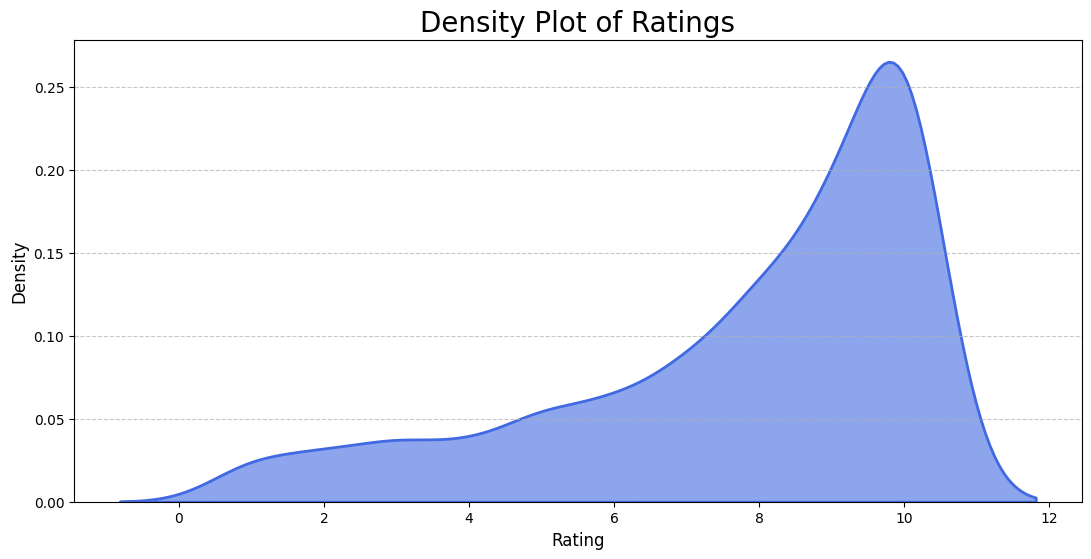

In [122]:
plt.figure(figsize=(13, 6))

# KDE plot for Rating distribution
sns.kdeplot(df['Rating'], fill=True, color='royalblue', alpha=0.6, linewidth=2)

# Labels and title
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density Plot of Ratings', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

### **2. Show Distribution of Reviews** 

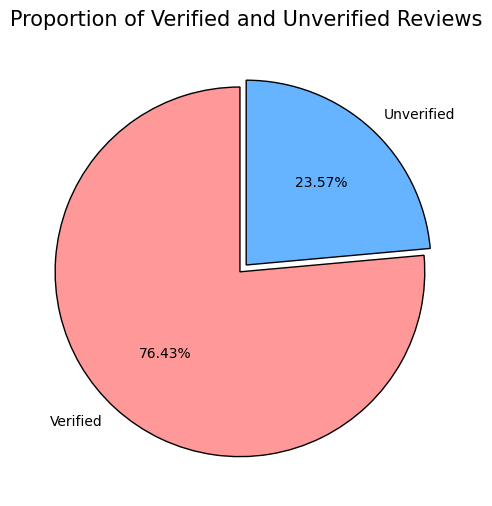

In [123]:
# Get value counts for Verified column
verified_counts = df['Verified'].value_counts()

# Define custom colors
colors = ['#FF9999', '#66B3FF']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(verified_counts, labels=['Verified', 'Unverified'], autopct='%.2f%%', 
        colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'}, explode=[0.05, 0])

# Add title
plt.title('Proportion of Verified and Unverified Reviews', fontsize=15)

# Show plot
plt.show()

### **3. Show Distribution of Countries** 

Distribution of Top 20 Countries

In [124]:
df['Country'].unique()

array(['Australia', 'Qatar', 'United Kingdom', 'United States', 'Germany',
       'Singapore', 'Lebanon', 'Iceland', 'Greece', 'Switzerland',
       'Belgium', 'Kuwait', 'United Arab Emirates', 'Italy', 'Sweden',
       'Denmark', 'France', 'Nepal', 'Thailand', 'Oman', 'Czech Republic',
       'Poland', 'New Zealand', 'India', 'Indonesia', 'Vietnam',
       'Netherlands', 'Romania', 'Philippines', 'Hong Kong', 'Bulgaria',
       'South Africa', 'Japan', 'Ireland', 'Algeria', 'Spain', 'Malaysia',
       'Kenya', 'Turkey', 'Norway', 'Canada', 'Brazil', 'Pakistan',
       'Iran', 'Brunei', 'China', 'Saudi Arabia', 'Slovenia', 'Portugal',
       'Croatia', 'South Korea', 'Sri Lanka', 'Dominican Republic',
       'Austria', 'Finland', 'Tunisia', 'Serbia', 'Bangladesh',
       'Russian Federation', 'Mozambique', 'Bosnia and Herzegovina',
       'Laos', 'Georgia', 'Trinidad & Tobago', 'Taiwan', 'Zambia',
       'Macau', 'Myanmar', 'Cyprus', 'Egypt', 'Zimbabwe', 'Panama',
       'Papua New Gui

In [125]:
# Number of Unique countries within data.
df['Country'].nunique()

81

Since There are total 81 countries, we'll take only top 20 countries for better understanding, on major customers belonging to which country.

In [126]:
# Top 20 countries by Travellers
df['Country'].value_counts().head(20)

Country
United Kingdom          243
United States           133
Australia               123
Germany                  89
Qatar                    57
Thailand                 37
Sweden                   30
United Arab Emirates     30
Vietnam                  28
Switzerland              26
South Africa             25
Denmark                  25
Netherlands              24
Malaysia                 23
Singapore                23
India                    23
Hong Kong                22
Italy                    21
Canada                   19
Philippines              17
Name: count, dtype: int64

`United Kingdom` is the country where we have highest number of customers from followed by United States and Australia.

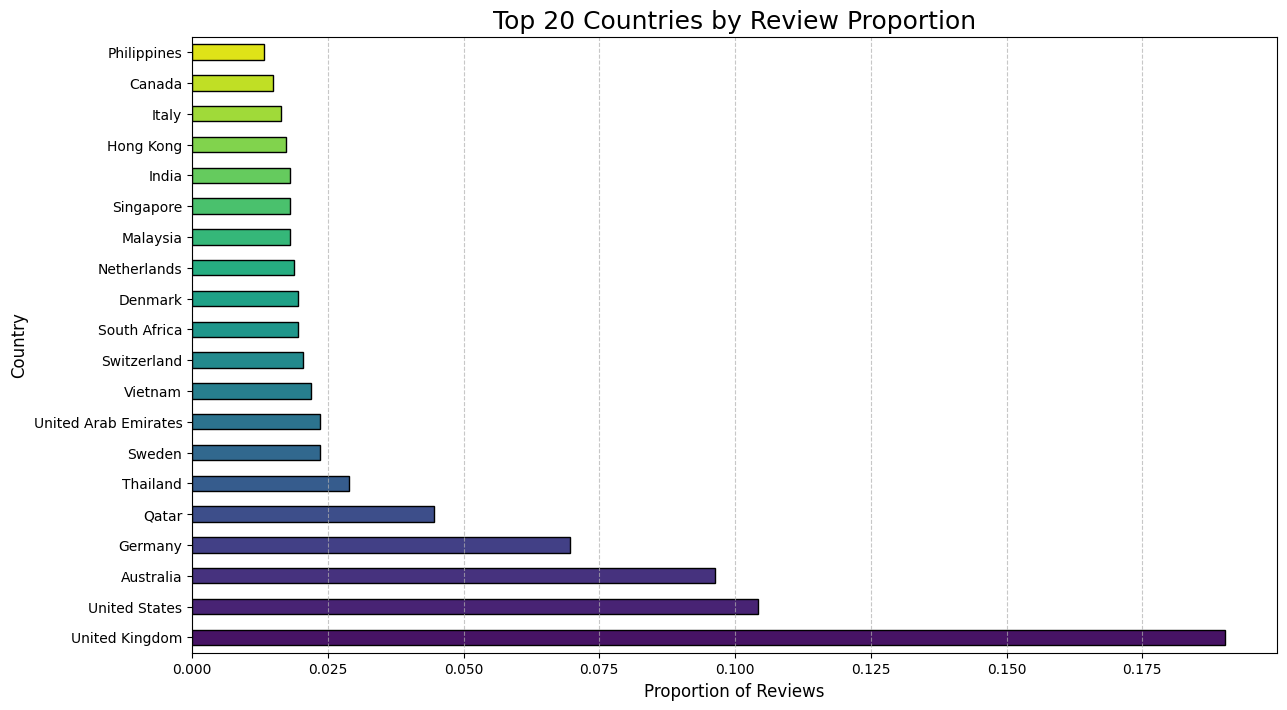

In [127]:
# Get the top 20 countries
top_countries = df['Country'].value_counts(normalize=True).head(20)

# Set a color palette
colors = sns.color_palette("viridis", len(top_countries))

# Create a horizontal bar plot
plt.figure(figsize=(14, 8))
top_countries.plot(kind='barh', color=colors, edgecolor='black')

# Labels and title
plt.xlabel('Proportion of Reviews', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Top 20 Countries by Review Proportion', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()

### **4. Recommendation by Customers from Top 10 Countries** 

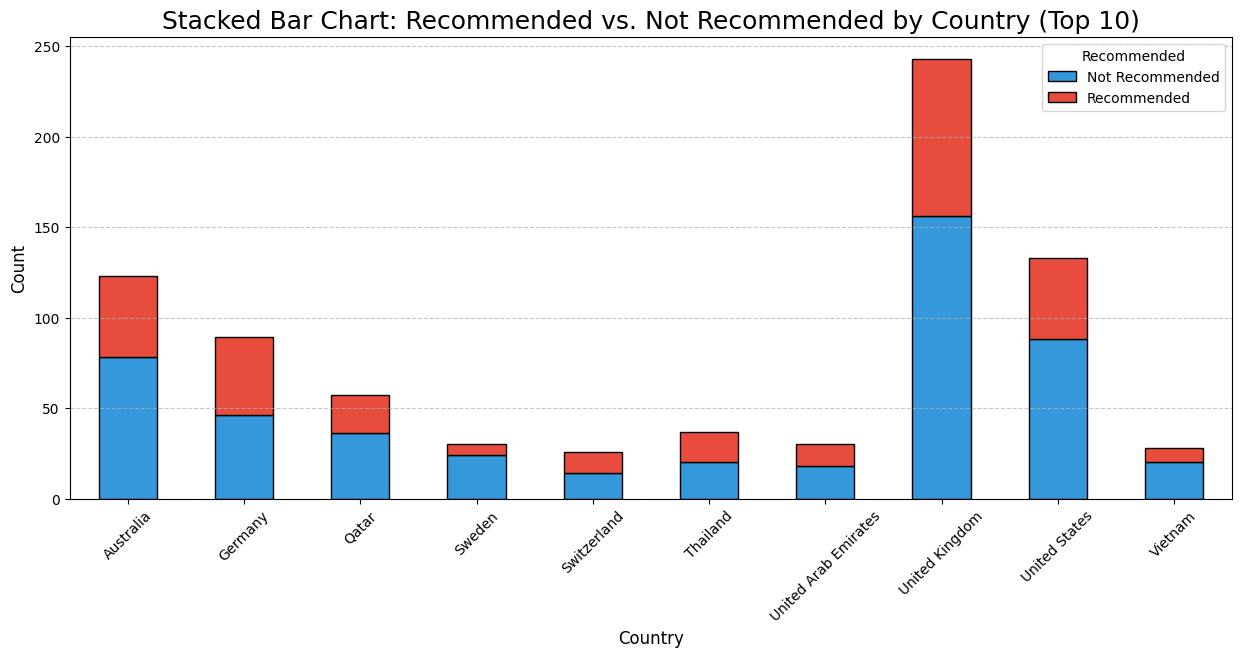

In [128]:
# Selecting the top 10 countries
top_10_countries = df['Country'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 countries
df_top_10_countries = df[df['Country'].isin(top_10_countries)]

# Create a crosstab for stacked bar chart
country_recommendation = pd.crosstab(df_top_10_countries['Country'], df_top_10_countries['Recommended'])

# Set custom colors
colors = ['#3498DB', '#E74C3C']  # Blue for Recommended, Red for Not Recommended

# Plot the stacked bar chart
country_recommendation.plot(kind='bar', stacked=True, figsize=(15, 6), color=colors, edgecolor='black')

# Labels and title
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Stacked Bar Chart: Recommended vs. Not Recommended by Country (Top 10)', fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Recommended', labels=['Not Recommended', 'Recommended'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

### **5. Distribution by Type of Travellers** 

#### **A. Bar Plot**

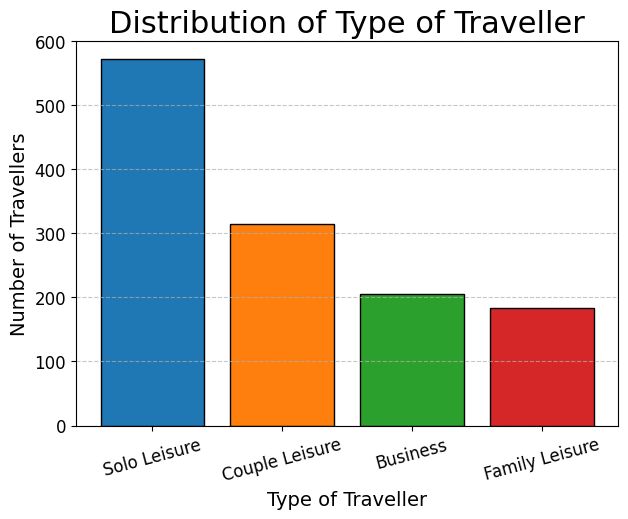

In [130]:
# Count values for 'Type Of Traveller'
type_of_traveller_counts = df['Type Of Traveller'].value_counts()

# Set figure size
plt.figure(figsize=(7, 5))

# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create bar chart
plt.bar(type_of_traveller_counts.index, type_of_traveller_counts.values, color=colors, edgecolor='black')

# Labels and title
plt.xlabel('Type of Traveller', fontsize=14)
plt.ylabel('Number of Travellers', fontsize=14)
plt.title('Distribution of Type of Traveller', fontsize=22)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

#### **B. RainCloud Plot**

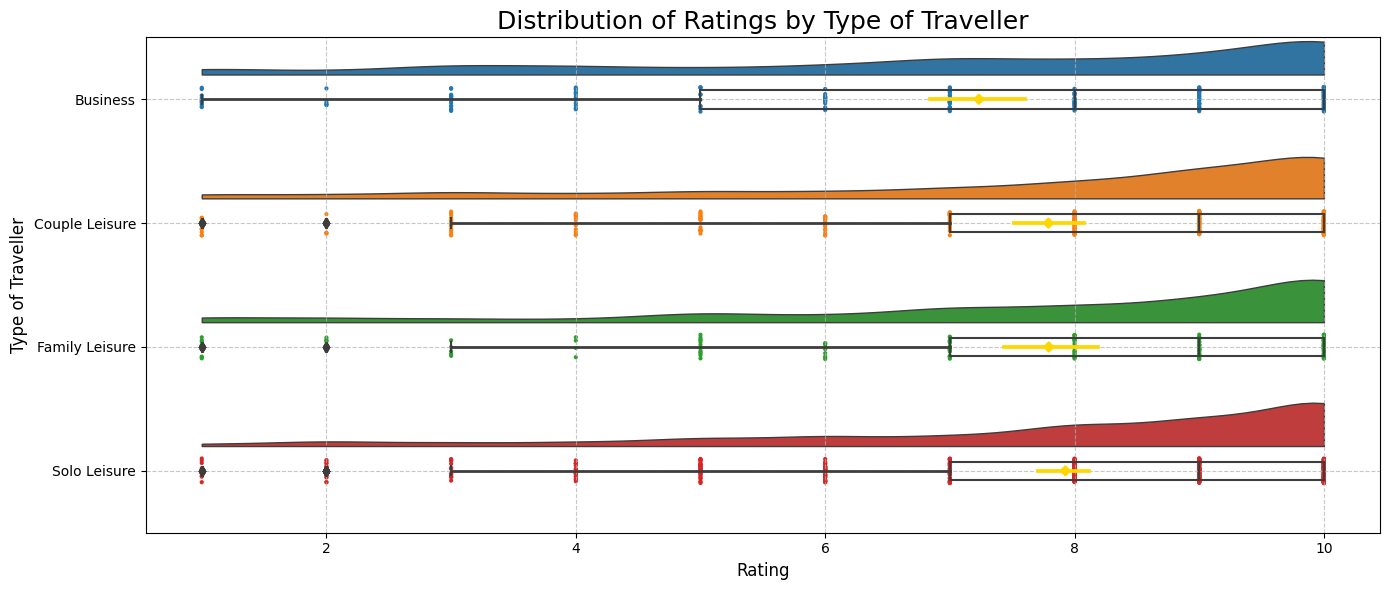

In [131]:
# Set figure size
plt.figure(figsize=(14, 6))

# Define custom colors
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Create RainCloud plot with new colors
pt.RainCloud(x='Type Of Traveller', y='Rating', data=df, orient='h', alpha=1, palette=custom_palette)

# Adding mean line with a different color
sns.pointplot(x='Rating', y='Type Of Traveller', data=df, join=False, color='#FFD700', markers='D', scale=0.7, legend=True)

# Labels and title
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Type of Traveller', fontsize=12)
plt.title('Distribution of Ratings by Type of Traveller', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

This code generates a combined RainCloud and point plot to visualize how ratings are distributed across different types of travelers.

The command plt.figure(figsize=(14, 7)) sets the figure dimensions to 14 inches wide and 7 inches tall.

The RainCloud() function is used to create a distributional plot that merges elements of box plots, violin plots, and scatter plots. It visualizes the spread of ratings (y='Rating') for each traveler category (x='Type Of Traveller'), providing insights into data distribution. The parameter orient='h' ensures a horizontal layout, while alpha=1 sets the RainClouds to full opacity for clear visibility.

Additionally, sns.pointplot() overlays mean ratings for each traveler category. Each point represents the average rating, with join=False ensuring no lines connect them. The points are colored red (color='red'), shaped as diamonds (markers='D'), and scaled to 70% of the default size (scale=0.7). The legend=True parameter adds a legend to clarify the marker representation.

To enhance readability, axis labels (plt.xlabel(), plt.ylabel()), a title (plt.title()), and a grid (plt.grid()) are included. The plt.tight_layout() function optimizes spacing between elements, ensuring a clean layout, and plt.show() displays the final visualization.

1. Rainclouds (Density Curves with Individual Data Points):
The rainclouds illustrate the distribution of ratings for each traveler type by combining kernel density estimation (KDE) plots and individual data points.
The cloudy region represents the KDE, depicting the probability density of ratings. Darker areas indicate a higher concentration of ratings, while lighter areas show lower density.
The vertical lines extending from the cloud correspond to individual data points, showing the exact spread of ratings across the scale.
2. Mean Rating Markers:
The red diamond-shaped markers highlight the mean rating for each traveler category.
These markers offer a central tendency measure, making it easy to see the average rating within each traveler group at a glance.
3. Insights and Interpretation:
Examining the raincloud shapes, spread, and density variations reveals how different traveler types experience variations in rating distributions.
The position and shape of the rainclouds help identify differences in traveler satisfaction, with wider spreads indicating more diverse ratings and narrower clouds showing consistency.
Comparing the mean rating markers across groups quickly reveals which traveler types tend to give higher or lower ratings.

### **6. Rating Distribution by Seat Type** 

In [132]:
df['Seat Type'].value_counts()

Seat Type
Economy Class      663
Business Class     586
First Class         24
Premium Economy      4
Name: count, dtype: int64

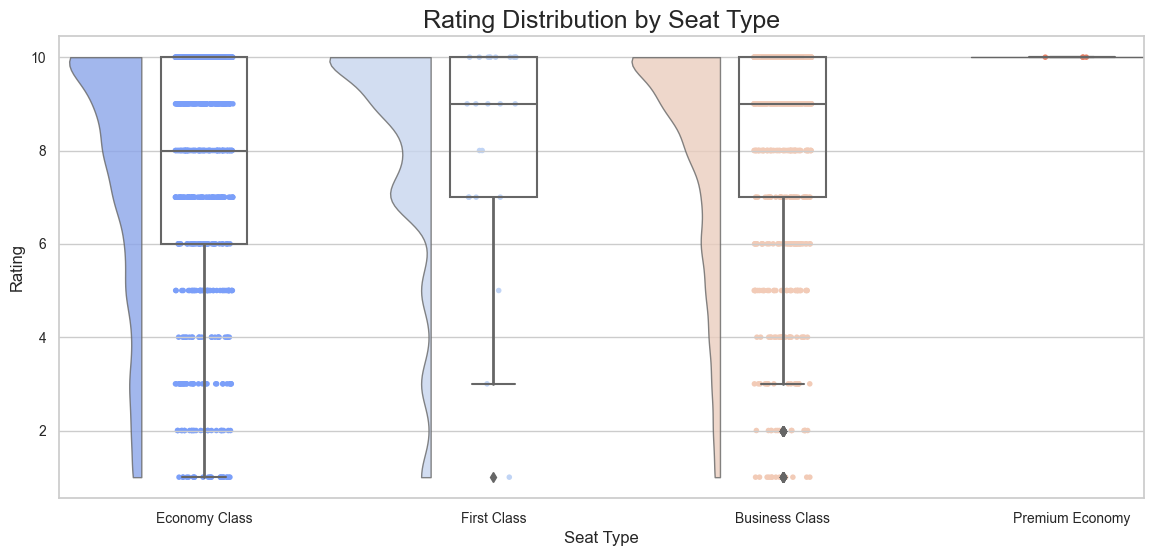

In [133]:
import ptitprince as pt
# Set figure size and theme
plt.figure(figsize=(14, 6))
sns.set_theme(style='whitegrid')

# Create a RainCloud plot with new colors
pt.RainCloud(x='Seat Type', y='Rating', data=df, orient='v', palette="coolwarm", width_viol=0.7, width_box=0.3, point_size=4, alpha=0.8)

# Customize labels and title
plt.xlabel('Seat Type', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Rating Distribution by Seat Type', fontsize=18)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.show()



### **7. Recommended vs. Not Recommended** 

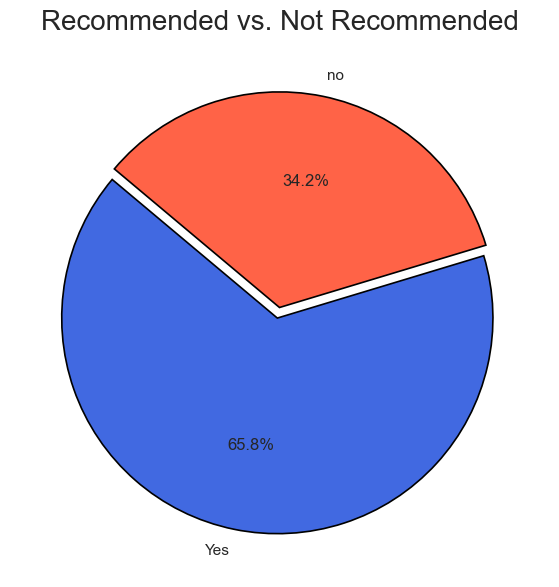

In [135]:
recommend_counts = df['Recommended'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(recommend_counts, 
        labels=recommend_counts.index, 
        autopct='%1.1f%%', 
        colors=['royalblue', 'tomato'],  # Updated colors
        startangle=140,  # Rotates the pie for better visual appeal
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.2},  # Adds a border
        explode=(0.05, 0))  # Slightly separate one slice for emphasis

plt.title('Recommended vs. Not Recommended', fontsize=20)
plt.show()


### **8. Top 5 Repeating Customers by Country Flying with Qatar Airways**

In [136]:
df[['Country', 'Author']].value_counts().head(6)

Country        Author          
Vietnam        Anders Pedersen     26
Germany        Michael Schade      23
Qatar          Alwaleed Althani    22
Denmark        Anders Pedersen     12
Iceland        Rajan Parrikar       9
United States  R Sanyal             8
Name: count, dtype: int64

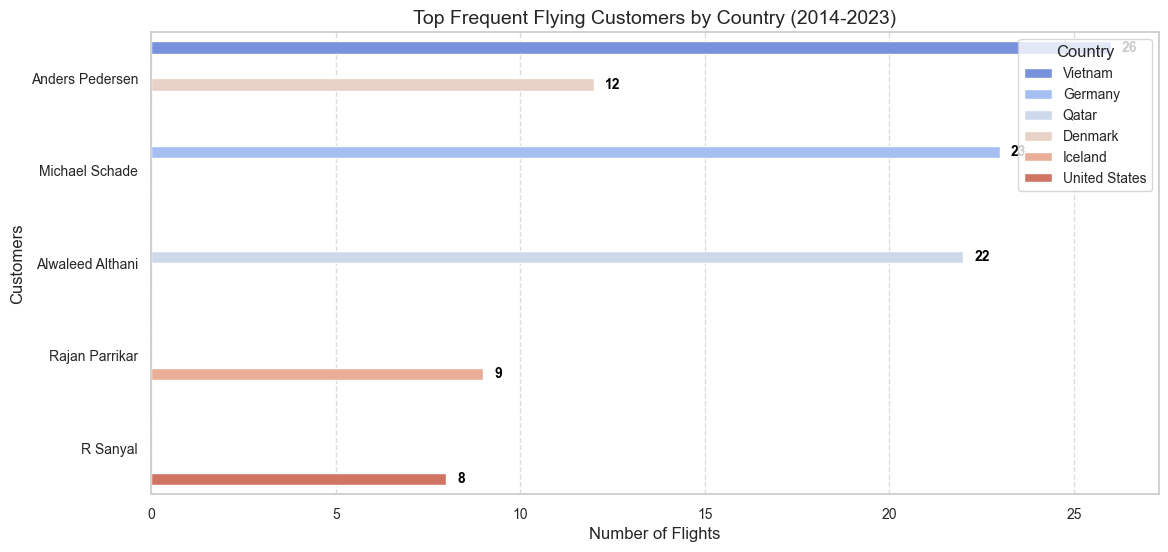

In [139]:
plt.figure(figsize=(13, 6))

# Grouping and handling NaN values by filling them with 0
top_customers = df.groupby(['Author', 'Country']).size().reset_index(name='Count').nlargest(6, 'Count')
top_customers['Count'] = top_customers['Count'].fillna(0)  # Replace NaN with 0

bars = sns.barplot(
    x='Count', 
    y='Author', 
    hue='Country', 
    dodge=True, 
    data=top_customers, 
    palette='coolwarm'  # Different color scheme
)

plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Customers', fontsize=12)
plt.title('Top Frequent Flying Customers by Country (2014-2023)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Country', fontsize=10, loc='best')

# Add value annotations (handling NaN safely)
for bar in bars.patches:
    width = bar.get_width()
    if not pd.isna(width) and width > 0:  # Avoid NaN values
        plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, 
                 f'{int(width)}', ha='left', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()


### **9. Top 5 Customers by Type of Travelling through Qatar Airways**

In [140]:
df.groupby(['Author', 'Type Of Traveller']).size().reset_index(name='Count').nlargest(10, 'Count')

,Author,Type Of Traveller,Count
609,Michael Schade,Solo Leisure,22
63,Anders Pedersen,Business,19
65,Anders Pedersen,Solo Leisure,16
60,Alwaleed Althani,Solo Leisure,11
59,Alwaleed Althani,Family Leisure,8
771,R Sanyal,Solo Leisure,8
788,Rajan Parrikar,Couple Leisure,7
607,Michael Schade,Business,6
1014,W Simpson,Couple Leisure,6
226,David Taylor,Business,5


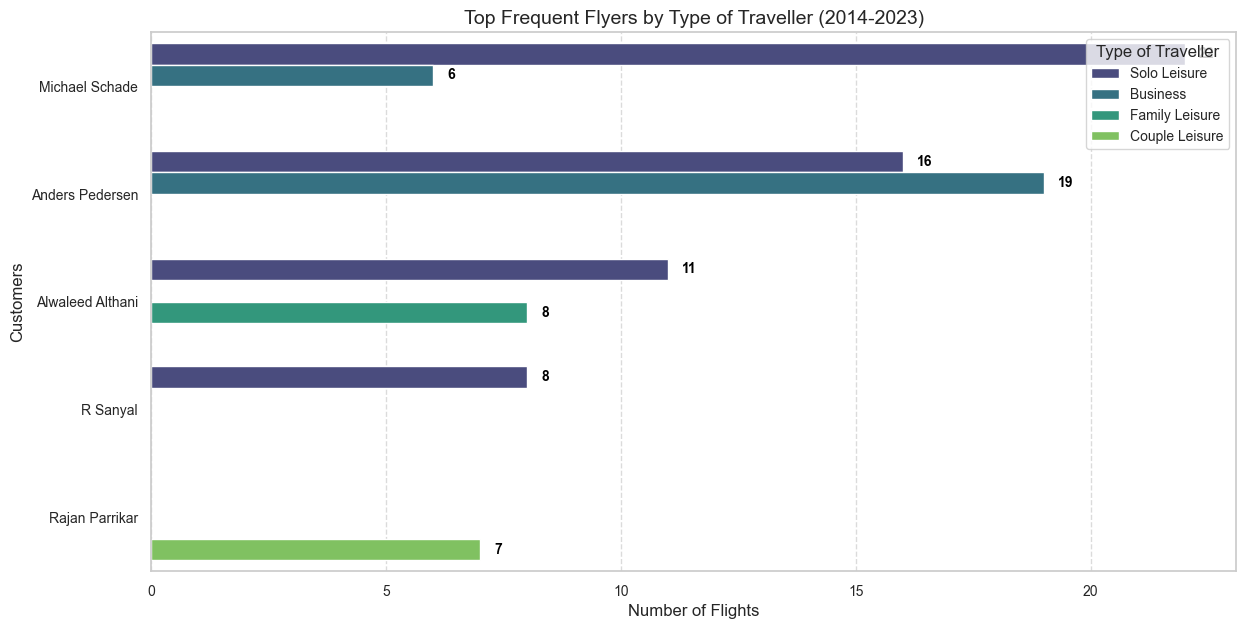

In [141]:
plt.figure(figsize=(14, 7))

# Grouping and handling NaN values
top_customers = df.groupby(['Author', 'Type Of Traveller']).size().reset_index(name='Count').nlargest(8, 'Count')

# Horizontal bar chart for better readability
bars = sns.barplot(
    y='Author', 
    x='Count', 
    hue='Type Of Traveller', 
    dodge=True, 
    data=top_customers, 
    palette='viridis'  # Updated color scheme
)

plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Customers', fontsize=12)
plt.title('Top Frequent Flyers by Type of Traveller (2014-2023)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Type of Traveller', fontsize=10, loc='upper right')

# Adding annotations
for bar in bars.patches:
    width = bar.get_width()
    if not pd.isna(width) and width > 0:  # Avoid NaN values
        plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, 
                 f'{int(width)}', ha='left', va='center', fontsize=10, color='black', fontweight='bold')

plt.show()


### **10. Month-Year-level Analysis on number of Travellers**

Changing `Date Flown` Column to two seperate columns named `Month Flown` & `Year Flown` for further easy analysis. 

In [142]:
# Converting Date Flown to DateTime format
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

# Extracting month and year into separate columns
df['Month Flown'] = df['Date Flown'].dt.strftime('%B')
df['Year Flown'] = df['Date Flown'].dt.year

C:\Users\91812\AppData\Local\Temp\ipykernel_31340\1439938135.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Flown'] = pd.to_datetime(df['Date Flown'])


In [143]:
# Dropping Original `Date Flown` column as it became redundant in table.
df.drop('Date Flown', axis = 1, inplace = True)

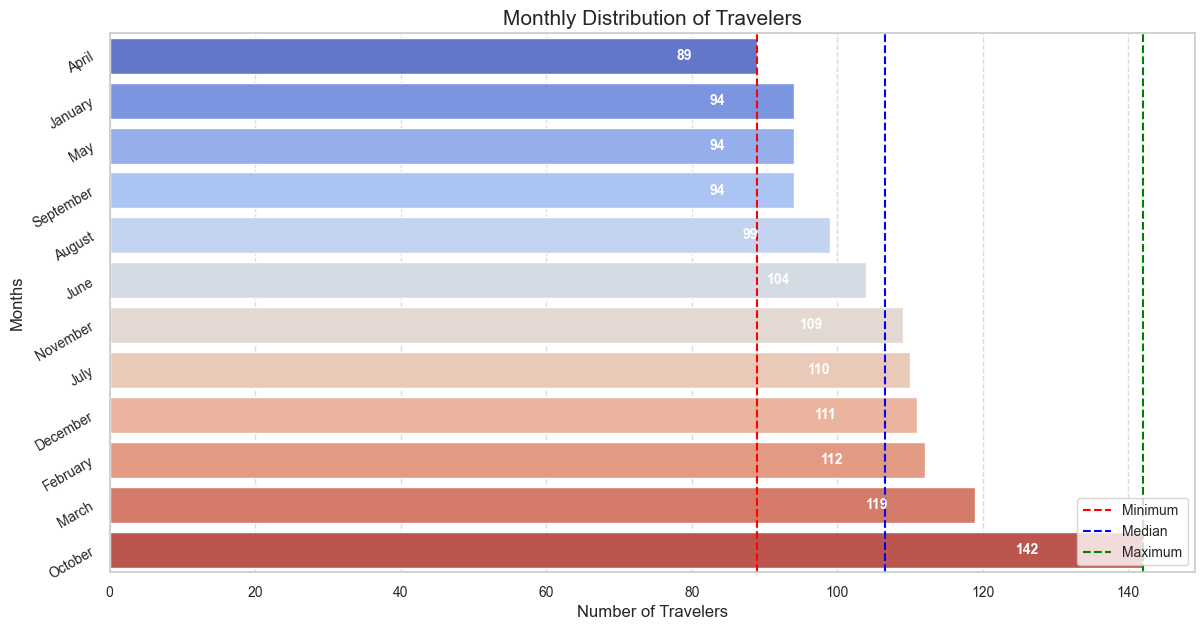

In [145]:
plt.figure(figsize=(14, 7))
sns.set_theme(style='whitegrid')

# Grouping and plotting
monthly_travelers = df.groupby('Month Flown')['Author'].count().sort_values(ascending=True)

# Creating a horizontal bar chart using Seaborn
bars = sns.barplot(
    y=monthly_travelers.index, 
    x=monthly_travelers.values, 
    palette='coolwarm',  # New color scheme
    orient='h'
)

# Adding annotations inside bars
for bar, value in zip(bars.patches, monthly_travelers.values):
    bars.annotate(f'{value}', 
                  xy=(value - (value * 0.1), bar.get_y() + bar.get_height()/2), 
                  ha='right', va='center', fontsize=10, color='white', fontweight='bold')

plt.xlabel('Number of Travelers', fontsize=12)
plt.ylabel('Months', fontsize=12)
plt.title('Monthly Distribution of Travelers', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=30)  # Rotated for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding key statistical lines
plt.axvline(x=monthly_travelers.min(), color='red', linestyle='--', label='Minimum')
plt.axvline(x=monthly_travelers.median(), color='blue', linestyle='--', label='Median')
plt.axvline(x=monthly_travelers.max(), color='green', linestyle='--', label='Maximum')

plt.legend(fontsize=10, loc='lower right')
plt.show()


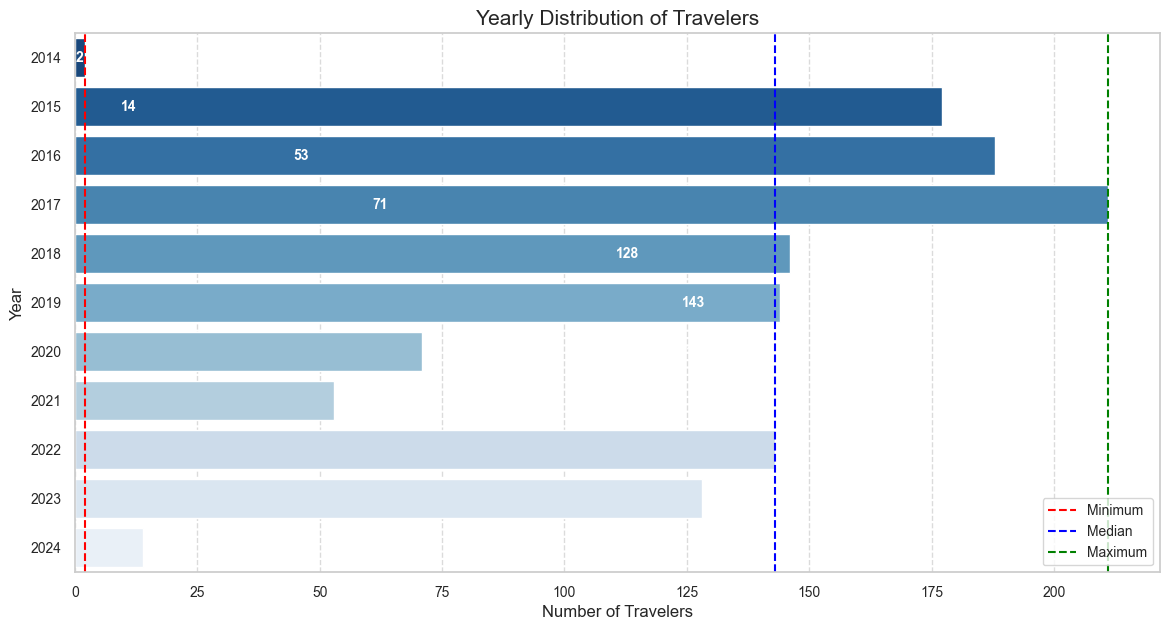

In [146]:
plt.figure(figsize=(14, 7))
sns.set_theme(style='whitegrid')

# Grouping and sorting data
yearly_travelers = df.groupby('Year Flown')['Author'].count().sort_values(ascending=True)

# Creating a horizontal bar chart using Seaborn
bars = sns.barplot(
    y=yearly_travelers.index, 
    x=yearly_travelers.values, 
    palette='Blues_r',  # New color scheme
    orient='h'
)

# Adding annotations inside bars
for bar, value in zip(bars.patches, yearly_travelers.values):
    bars.annotate(f'{value}', 
                  xy=(value - (value * 0.1), bar.get_y() + bar.get_height()/2), 
                  ha='right', va='center', fontsize=10, color='white', fontweight='bold')

plt.xlabel('Number of Travelers', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.title('Yearly Distribution of Travelers', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Keeping it horizontal for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding statistical reference lines
plt.axvline(x=yearly_travelers.min(), color='red', linestyle='--', label='Minimum')
plt.axvline(x=yearly_travelers.median(), color='blue', linestyle='--', label='Median')
plt.axvline(x=yearly_travelers.max(), color='green', linestyle='--', label='Maximum')

plt.legend(fontsize=10, loc='lower right')
plt.show()


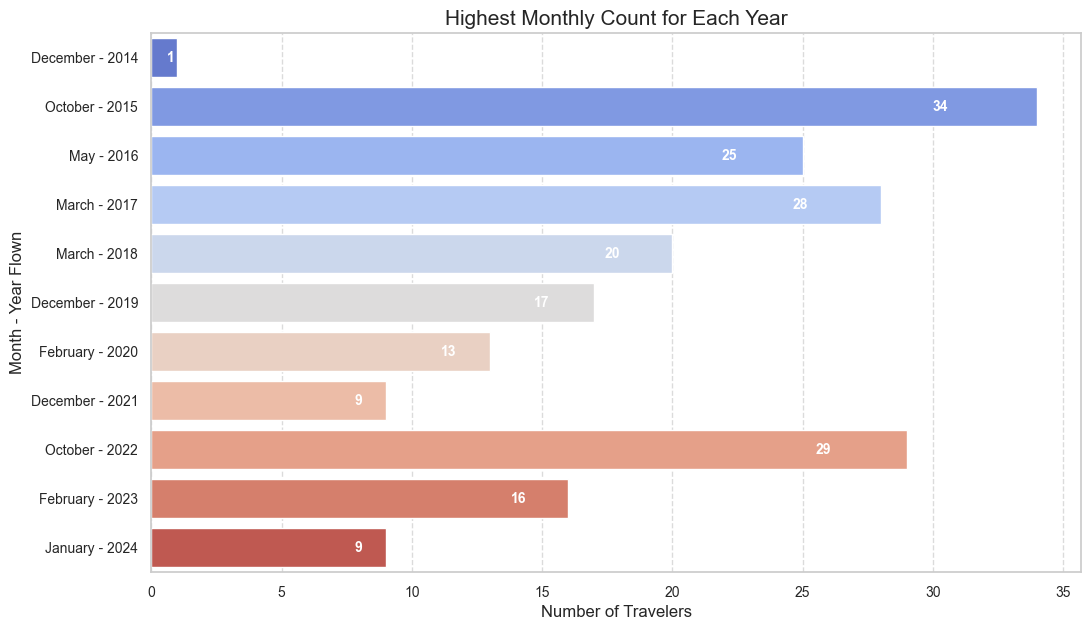

In [148]:
# Grouping and counting occurrences per Month-Year
monthly_counts = df.groupby(['Month Flown', 'Year Flown']).size()

# Finding the index corresponding to the maximum count for each year
max_counts_idx = monthly_counts.groupby('Year Flown').idxmax()

# Extracting the maximum counts
max_counts = monthly_counts.loc[max_counts_idx].reset_index()

plt.figure(figsize=(12, 7))
sns.set_theme(style='whitegrid')

# Formatting the Month-Year labels
max_counts['Month-Year'] = max_counts['Month Flown'] + " - " + max_counts['Year Flown'].astype(str)

# Creating a horizontal bar chart
bars = sns.barplot(
    x=max_counts[0], 
    y=max_counts['Month-Year'], 
    palette='coolwarm', 
    orient='h'
)

# Adding annotations inside bars
for bar, value in zip(bars.patches, max_counts[0]):
    plt.text(value - (value * 0.1),  # Position inside the bar
             bar.get_y() + bar.get_height()/2, 
             f'{value}', ha='right', va='center', 
             fontsize=10, color='white', fontweight='bold')

plt.xlabel('Number of Travelers', fontsize=12)
plt.ylabel('Month - Year Flown', fontsize=12)
plt.title('Highest Monthly Count for Each Year', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

### **11. Top Locations Travelled by Travellers**

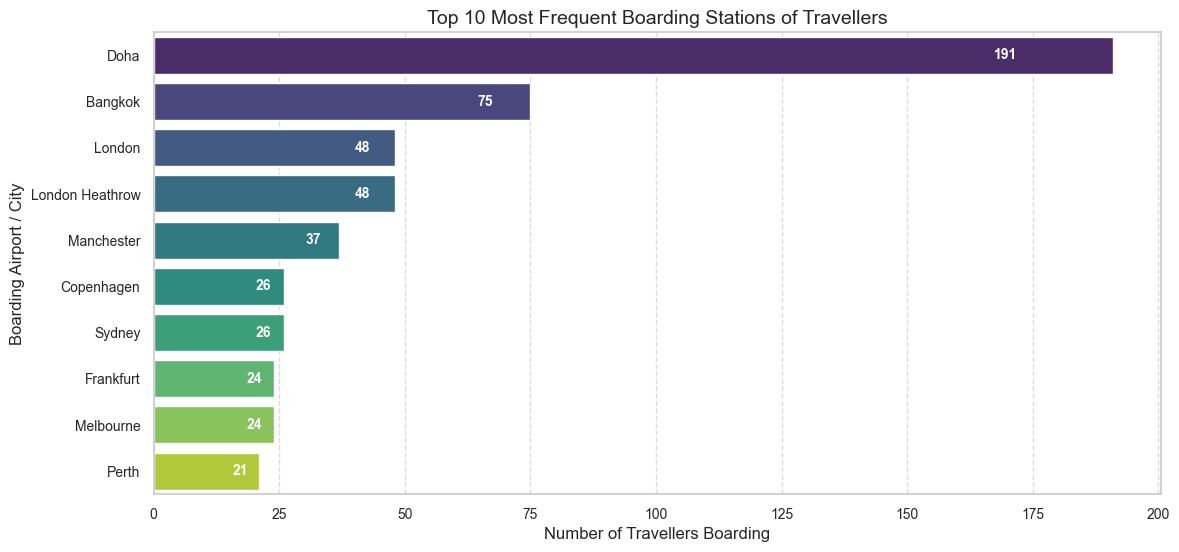

In [149]:

plt.figure(figsize=(13, 6))
sns.set_theme(style='whitegrid')

# Grouping and selecting the top 10 most frequent boarding locations
top_customers = df.groupby('From').size().reset_index(name='Count').nlargest(10, 'Count')

# Creating a horizontal bar chart with a color gradient
bars = sns.barplot(
    x='Count', 
    y='From', 
    data=top_customers, 
    palette='viridis',  # Changing color scheme
    hue=None
)

# Labels and Title
plt.xlabel('Number of Travellers Boarding', fontsize=12)
plt.ylabel('Boarding Airport / City', fontsize=12)
plt.title('Top 10 Most Frequent Boarding Stations of Travellers', fontsize=14)

# Grid and Ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value annotations inside bars
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width - (width * 0.1),  # Position text inside the bar
             bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='right', va='center', 
             fontsize=10, color='white', fontweight='bold')

plt.show()


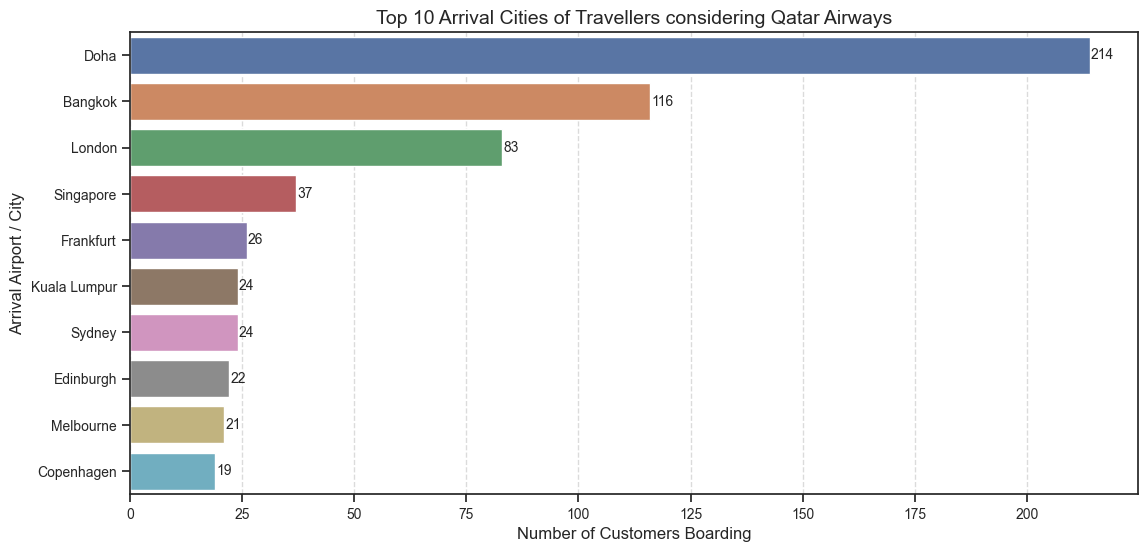

In [443]:
plt.figure(figsize=(13, 6))

# Grouping and plotting
top_customers = df.groupby('To').size().reset_index(name='Count').nlargest(10, 'Count')

bars = sns.barplot(x='Count', y='To', dodge=True, data=top_customers)

plt.xlabel('Number of Customers Boarding', fontsize=12)
plt.ylabel('Arrival Airport / City', fontsize=12)
plt.title('Top 10 Arrival Cities of Travellers considering Qatar Airways', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add value annotations to the bars
for bar in bars.patches:
    width = bar.get_width()
    if width > 0:  # Check if width is finite
        plt.text(width + 0.3, bar.get_y() + bar.get_height()/2, '{:.0f}'.format(width), ha='left', va='center', fontsize=10)

plt.show()

In [151]:
!pip install textblob


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     -------------------------------------  41.0/41.5 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 505.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------- ----------------------------- 163.8/626.3 kB 5.0 MB/s eta 0:00:01
   -------------------------- ------------- 419.8/626.3 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 4.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.5 MB 7.0 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 6.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.4 MB/s eta 0:00:00
   -

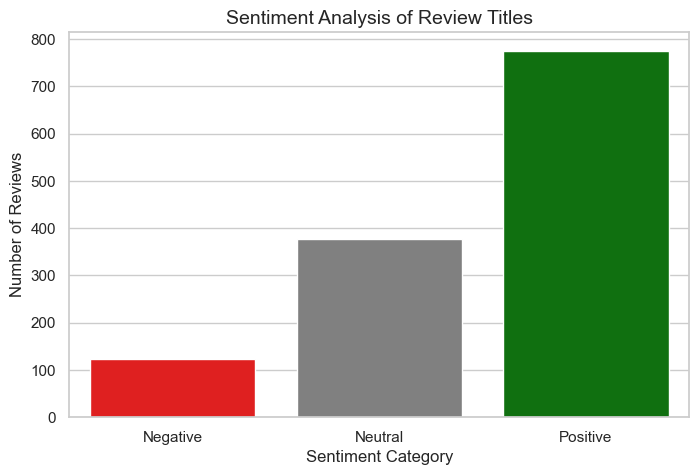

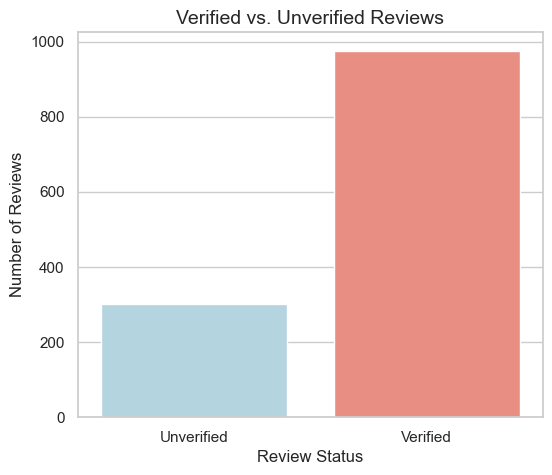

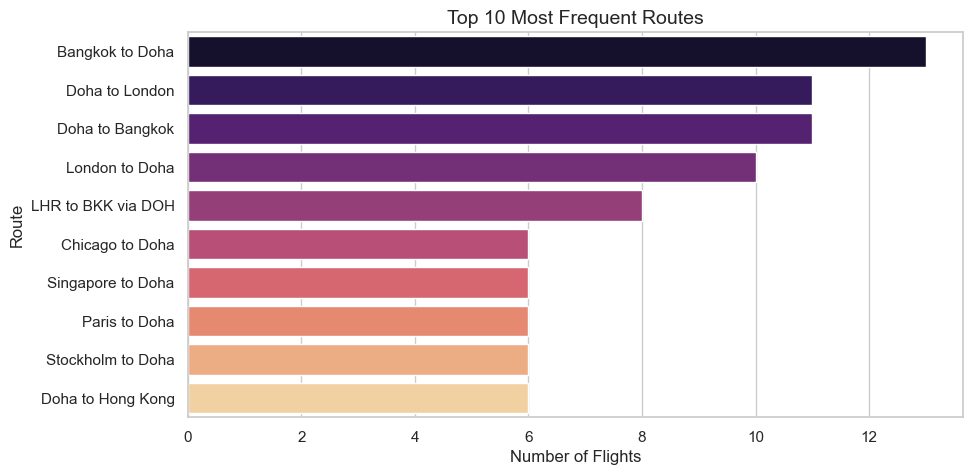

In [154]:


# Set plot style
sns.set_theme(style="whitegrid")

# 1. Sentiment Analysis of Review Titles (Basic: Positive, Negative, Neutral)
from textblob import TextBlob

df["Sentiment"] = df["Title"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment_Label"] = df["Sentiment"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

plt.figure(figsize=(8, 5))
sns.countplot(x="Sentiment_Label", data=df, palette=["red", "gray", "green"])
plt.title("Sentiment Analysis of Review Titles", fontsize=14)
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.show()



# 2. Verified vs. Unverified Reviews
plt.figure(figsize=(6, 5))
sns.countplot(x="Verified", data=df, palette=["lightblue", "salmon"])
plt.xticks([0, 1], ["Unverified", "Verified"])
plt.title("Verified vs. Unverified Reviews", fontsize=14)
plt.xlabel("Review Status")
plt.ylabel("Number of Reviews")
plt.show()

# 3. Most Frequent Routes & Hubs
plt.figure(figsize=(10, 5))
top_routes = df["Route"].value_counts().nlargest(10)
sns.barplot(y=top_routes.index, x=top_routes.values, palette="magma")
plt.title("Top 10 Most Frequent Routes", fontsize=14)
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()

